# Environment preparation

### Importing the main libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
from collections import Counter 

# we import our functions from the functions module
import functions

### Importing the the whole data set "instagram_profiles.csv"

In this case the data set is not too large, thus we can sinply import the whole csv with pandas. For the next excercises we are going to import only few columns of each data frame in order to reduce the computing complexity of our algorithms and avoid any problem related to the size of our inputs.

In [2]:
profiles = pd.read_csv('instagram_profiles.zip',delimiter='\t')

# let's have a look to the content of the data frame 
profiles.head(10)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN
5,4184465,1.450642e+08,sabahlke,Sarah bahlke,NaN,266.0,192.0,590.0,NaN,2019-08-01 14:40:16.443 -0400,False
6,4184471,2.061868e+09,masslivehs,MassLive High School Sports,Your spot for the best Western Mass. high scho...,157.0,4137.0,753.0,bit.ly/2HIysyv,2019-08-01 14:40:40.390 -0400,True
7,4184472,1.446651e+09,hvcanes,Hoosac Valley,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:52.635 -0400,NaN
8,4184475,1.743726e+09,will_jay_k,William Kramer,I’d rather die a big death than live a small life,115.0,183.0,37.0,NaN,2019-08-01 14:40:59.969 -0400,False
9,4184476,5.455198e+09,ashley_downing722,Ashley Downing,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:41:12.826 -0400,NaN


### Cleaning the data set 

We start by cleaning this data set with the dafault value of the relative type of attribute in the data set. Later in this notebook will be foundamental to correctly clean the data set when merging tables or manipulating the rows.

In [ ]:
# cleaning the NaN values
profiles.firstname_lastname.fillna('',inplace=True)
profiles.description.fillna('',inplace=True)
profiles.url.fillna('',inplace=True)
profiles.is_business_account.fillna(False,inplace=True)
profiles.cts.fillna('',inplace=True)
profiles.following.fillna(0, inplace=True)
profiles.followers.fillna(0, inplace=True)
profiles.n_posts.fillna(0, inplace=True)
profiles.head(10)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,,0.0,0.0,0.0,,2019-08-01 14:40:06.472 -0400,False
4,4184462,3.531421e+09,luckyfluff,,,0.0,0.0,0.0,,2019-08-01 14:40:07.806 -0400,False
5,4184465,1.450642e+08,sabahlke,Sarah bahlke,,266.0,192.0,590.0,,2019-08-01 14:40:16.443 -0400,False
6,4184471,2.061868e+09,masslivehs,MassLive High School Sports,Your spot for the best Western Mass. high scho...,157.0,4137.0,753.0,bit.ly/2HIysyv,2019-08-01 14:40:40.390 -0400,True
7,4184472,1.446651e+09,hvcanes,Hoosac Valley,,0.0,0.0,0.0,,2019-08-01 14:40:52.635 -0400,False
8,4184475,1.743726e+09,will_jay_k,William Kramer,I’d rather die a big death than live a small life,115.0,183.0,37.0,,2019-08-01 14:40:59.969 -0400,False
9,4184476,5.455198e+09,ashley_downing722,Ashley Downing,,0.0,0.0,0.0,,2019-08-01 14:41:12.826 -0400,False


# [RQ1] After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

### Profiles:

In [2]:
import pandas as pd
profiles = pd.read_csv('~/instagram_profiles.zip', delimiter='\t')

We start importing pandas and instagram_profiles. Then let's see our date with funcions head and tail that show first and last 5 rows of the dataset

In [3]:
profiles.head()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


In [4]:
profiles.tail()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
4509581,4184467,1.418322e+09,karenarkesteyn,Karen Arkesteyn,🙏🏻,468.0,481.0,497.0,NaN,2019-08-01 14:40:26.554 -0400,False
4509582,4184469,1.340704e+07,jornvlaeminck,Jorn Vlaeminck,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:41.628 -0400,NaN
4509583,4184470,6.007354e+09,s_degol,Sanne Degol,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:42.983 -0400,NaN
4509584,4184473,2.338990e+07,anwilms,An Wilms,Fashion - travel - photography ... that's me!👗...,504.0,153.0,183.0,NaN,2019-08-01 14:40:49.982 -0400,False
4509585,4184511,2.088094e+09,arnaubassols_,Arnau Bassols Noguer,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:42:30.055 -0400,NaN


In [5]:
profiles.shape

(4509586, 11)

There are 4509586 rows (profiles) and 11 columns (variables)

In [6]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   sid                  int64  
 1   profile_id           float64
 2   profile_name         object 
 3   firstname_lastname   object 
 4   description          object 
 5   following            float64
 6   followers            float64
 7   n_posts              float64
 8   url                  object 
 9   cts                  object 
 10  is_business_account  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB


With info function we can understand classes of our variables. they are 6 objects, 4 float64 and a int64

In [8]:
profiles.describe()

,sid,profile_id,following,followers,n_posts
count,4.509586e+06,4.477139e+06,3.452771e+06,3.452771e+06,3.452771e+06
mean,2.255992e+06,3.083302e+09,1.405641e+03,4.739899e+03,4.095414e+02
std,1.301807e+06,4.266575e+10,8.113473e+03,1.939087e+05,1.041940e+03
min,1.186000e+03,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.128596e+06,2.735177e+08,3.560000e+02,1.590000e+02,2.200000e+01
50%,2.255992e+06,1.649248e+09,7.540000e+02,4.060000e+02,1.200000e+02
75%,3.383389e+06,5.514691e+09,1.573000e+03,9.740000e+02,4.200000e+02
max,4.510785e+06,9.001013e+13,4.191080e+06,2.854576e+08,1.837300e+05


We can start analyzing features of numerical variables but we are interested only in last three columns, because first two are identifying variables. The minimum values of following, followers and n_post are all 0, and maximum values are 4.191080e+06,	2.854576e+08 and 1.837300e+05. Mean of followers is bigger than the mean of following, but the median (that is more resistant statistic) of following is bigger than the followers one.

In [3]:
#profiles.is_business_account.fillna(False,inplace=True)
print(profiles["is_business_account"].value_counts())
print(profiles["is_business_account"].value_counts(normalize=True))
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="is_business_account", data=profiles, edgecolor = 'black')

After importing seaborn and matplotlib, we can analyze what accounts are business. They are 855254 in 4509586 (24.8% of the population). In this case we are considering only profiles with no null values on the variable is_business_account.

In [10]:
def find_outliers(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers


This is a function to find outliers, based on interquantile difference

number of outliers of following variable: 370009
max outlier value of following variable: 4191080.0
min outlier value of following variable: 3399.0


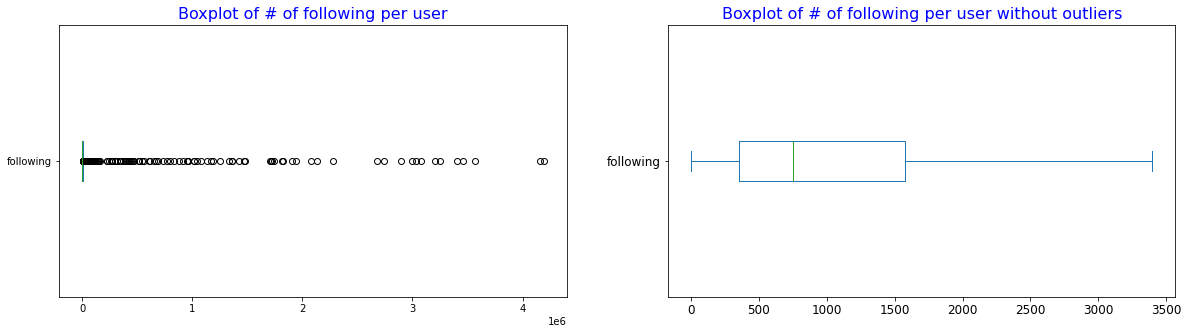

In [11]:
nofollowing=find_outliers(profiles['following'])
print('number of outliers of following variable: '+ str(len(nofollowing)))
print('max outlier value of following variable: '+ str(nofollowing.max()))
print('min outlier value of following variable: '+ str(nofollowing.min()))

plt.figure(figsize=(20,5))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Boxplot of # of following per user", {"fontsize":16, "color":"blue"})
profiles.following.plot.box(vert = False)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Boxplot of # of following per user without outliers", {"fontsize":16, "color":"blue"})
profiles.following.plot.box(showfliers=False, vert = False, fontsize = "large")
plt.show()

These boxplots show the number of following with and without outliers

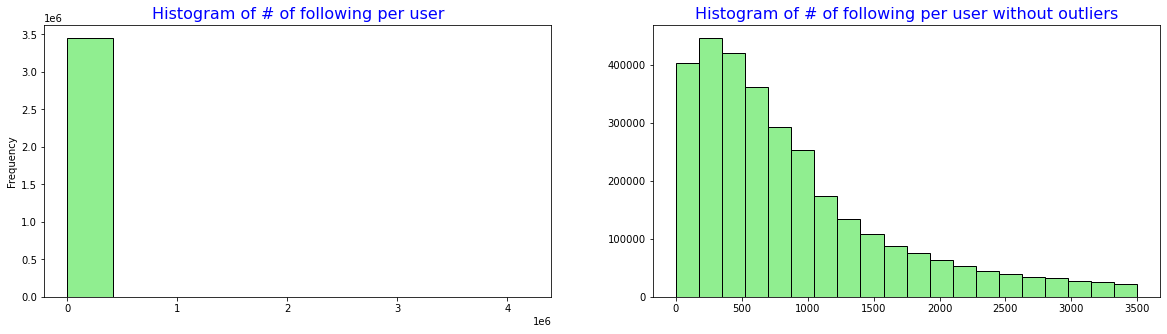

In [43]:
plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Histogram of # of following per user", {"fontsize":16, "color":"blue"})
profiles.following.plot.hist(color='lightgreen',edgecolor='black')

ax2 = plt.subplot(1, 2, 2)
followen = profiles[profiles['following']<3500]
ax2.set_title("Histogram of # of following per user without outliers", {"fontsize":16, "color":"blue"})
plt.hist(followen['following'], bins = 20,color='lightgreen',edgecolor='black')
plt.show()

These histograms show the number of following with and without outliers (are considered outliers those profiles with more than 3500 following)

number of outliers of followers variable: 385054
max outlier value of followers variable: 285457645.0
min outlier value of followers variable: 2197.0


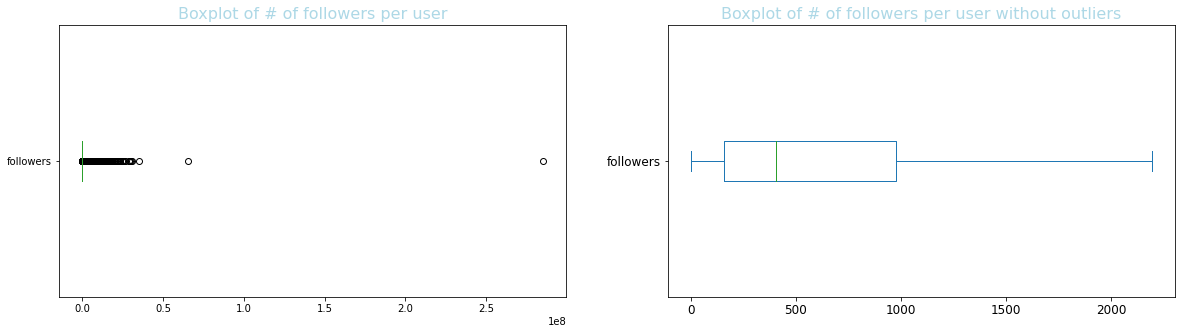

In [17]:
nofollowers=find_outliers(profiles['followers'])
print('number of outliers of followers variable: '+ str(len(nofollowers)))
print('max outlier value of followers variable: '+ str(nofollowers.max()))
print('min outlier value of followers variable: '+ str(nofollowers.min()))

plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Boxplot of # of followers per user", {"fontsize":16, "color":"lightblue"})
profiles.followers.plot.box(vert = False)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Boxplot of # of followers per user without outliers", {"fontsize":16, "color":"lightblue"})
profiles.followers.plot.box(showfliers=False, vert = False, fontsize = "large")
plt.show()

These boxplots show the number of following with and without outliers.
In following and followers, some outliers are very far from the distribution. The maximum outliers are 4191080.0 for following and 285457645.0 for followers

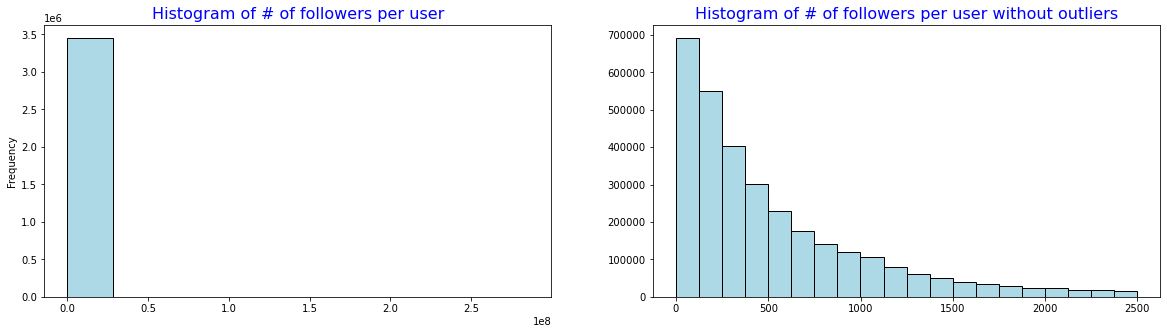

In [44]:
plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Histogram of # of followers per user", {"fontsize":16, "color":"blue"})
profiles.followers.plot.hist(color='lightblue',edgecolor='black')

ax2 = plt.subplot(1, 2, 2)
followezz = profiles[profiles['followers']<2500]
ax2.set_title("Histogram of # of followers per user without outliers", {"fontsize":16, "color":"blue"})
plt.hist(followezz['followers'], bins = 20,color='lightblue',edgecolor='black')
plt.show()

These histograms show the number of followers with and without outliers (are considered outliers those profiles with more than 2500 followers)

number of outliers of n_posts variable: 349151
max outlier value of n_posts variable: 183730.0
min outlier value of n_posts variable: 1018.0


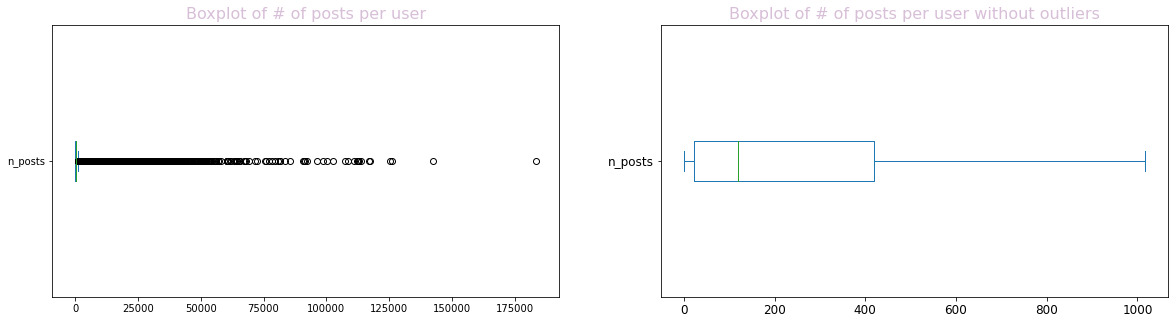

In [18]:
noposts=find_outliers(profiles['n_posts'])
print('number of outliers of n_posts variable: '+ str(len(noposts)))
print('max outlier value of n_posts variable: '+ str(noposts.max()))
print('min outlier value of n_posts variable: '+ str(noposts.min()))

plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Boxplot of # of posts per user", {"fontsize":16, "color":"thistle"})
profiles.n_posts.plot.box(vert = False)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Boxplot of # of posts per user without outliers", {"fontsize":16, "color":"thistle"})
profiles.n_posts.plot.box(showfliers=False, vert = False, fontsize = "large")
plt.show()

These boxplots show the number of following with and without outliers

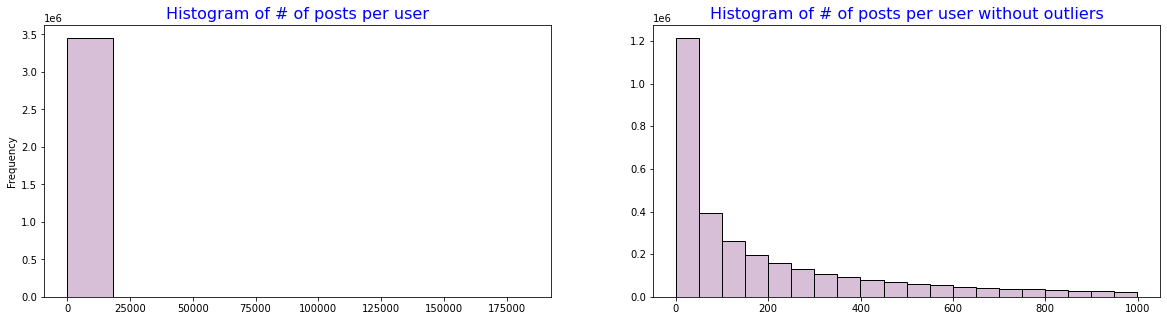

In [45]:
plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Histogram of # of posts per user", {"fontsize":16, "color":"blue"})
profiles.n_posts.plot.hist(color='thistle',edgecolor='black')

ax2 = plt.subplot(1, 2, 2)
post = profiles[profiles['n_posts']<1000]
ax2.set_title("Histogram of # of posts per user without outliers", {"fontsize":16, "color":"blue"})
plt.hist(post['n_posts'], bins = 20,color='thistle',edgecolor='black')
plt.show()

These histograms show the number of posts with and without outliers (are considered outliers those profiles with more than 1000 posts). A biggest part of the distribution is near to 0

Now let's see if there are null values

In [21]:
profiles.isnull().sum()

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

In [47]:
for column in profiles.columns:
    if profiles[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(profiles[column].isnull().sum() /
                                               profiles[column].shape[0]))

profile_id : 0.72%
firstname_lastname : 6.40%
description : 45.59%
following : 23.43%
followers : 23.43%
n_posts : 23.43%
url : 80.70%
cts : 9.72%
is_business_account : 23.60%


These are the percentages of null values in each variable.  We could replace these values with an empty string. There are also others methods such as raplace null values with the median of a variable or exclude the whole row. In this example we'll replace them with an empty string

In [48]:
profiles_copy = profiles.copy()

In [49]:
profiles_copy.firstname_lastname.fillna('', inplace=True)
profiles_copy.description.fillna('', inplace=True)
profiles_copy.url.fillna('', inplace=True)
profiles_copy.cts.fillna('', inplace=True)


In some cases we could replace null values with 'False'. We could assume that when not specified it is a not business account

In [50]:
profiles_copy.is_business_account.fillna(False, inplace=True)
c=profiles_copy["is_business_account"].value_counts()
print(c)

False    3654332
True      855254
Name: is_business_account, dtype: int64


<AxesSubplot:xlabel='following', ylabel='followers'>

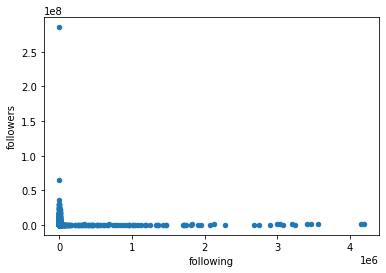

In [55]:
profiles_copy.plot(x='following', y='followers', kind='scatter')

With this scatter plot we can see that usually there are more followinf than followers in an instagram profiles

### Locations

In [4]:
import pandas as pd
locations = pd.read_csv('~/instagram_locations.zip', delimiter='\t')

As we did before, we can extract the head and the tail of locations distribution to see in general our data

In [56]:
locations.head()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [39]:
locations.tail()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
1022653,719973,873926439475785,Baby Season,Suarez de Figueroa # 380,NaN,"Santa Cruz de la Sierra, Bolivia",NaN,BO,69118383,False,...,Santa Cruz de la Sierra,santa-cruz-de-la-sierra,BO,Bolivia,-63.185307,-17.786130,babyseason.srl,baby-season,NaN,2019-05-29 01:20:57.078
1022654,719975,390707529,Cueva Carvajal,NaN,NaN,NaN,NaN,NaN,+52 81 2089 7776,NaN,...,NaN,NaN,NaN,NaN,-100.359619,25.653550,CuevaCarvajalBrewPub,cueva-carvajal,http://www.cuevacarvajal.mx,2019-05-29 01:21:04.434
1022655,719977,1205466612894741,The Cheesecake Factory,304 Orland Square Dr,60462,"Orland Park, Illinois",NaN,US,(708) 873-3747,False,...,Manor Homes,manor-homes,US,United States,-87.843649,41.618551,NaN,the-cheesecake-factory,http://locations.thecheesecakefactory.com/il/o...,2019-05-29 01:21:13.404
1022656,719979,286794844,Plimmer Towers,2 Gilmer Terrace,NaN,"Wellington, New Zealand",NaN,NZ,NaN,False,...,NaN,NaN,NaN,NaN,174.775000,-41.285800,NaN,plimmer-towers,NaN,2019-05-29 01:21:21.628
1022657,720678,554330673,Старые Бирюли,Северная улица,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,49.444430,55.979180,NaN,NaN,NaN,2019-05-29 02:07:00.772


In [40]:
locations.shape

(1022658, 23)

In [41]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

In [42]:
locations.describe()

,sid,id,lat,lng
count,1.022658e+06,1.022658e+06,1.016495e+06,1.016495e+06
mean,5.274856e+05,3.152851e+14,-1.529215e+01,3.421718e+01
std,2.994567e+05,5.795031e+14,7.615085e+01,2.201081e+01
min,1.000000e+00,7.000000e+00,-1.799830e+02,-9.000000e+01
25%,2.688392e+05,2.522377e+08,-8.015575e+01,2.997555e+01
50%,5.300405e+05,8.573350e+08,-2.450000e+00,4.067820e+01
75%,7.866598e+05,3.304662e+14,3.071740e+01,4.884722e+01
max,1.043657e+06,2.402148e+16,1.799941e+02,8.999870e+01


number of outliers of lat variable: 0
max outlier value of lat variable: nan
min outlier value of lat variable: nan


<AxesSubplot:>

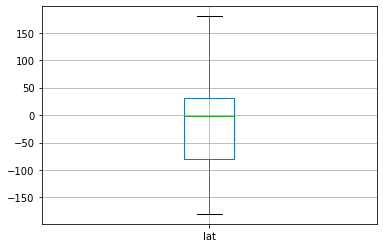

In [28]:
noloc=find_outliers(locations['lat'])
print('number of outliers of lat variable: '+ str(len(noloc)))
print('max outlier value of lat variable: '+ str(noloc.max()))
print('min outlier value of lat variable: '+ str(noloc.min()))

locations.boxplot(column=['lat'])

<AxesSubplot:title={'center':'Histogram of latitudes'}, ylabel='Frequency'>

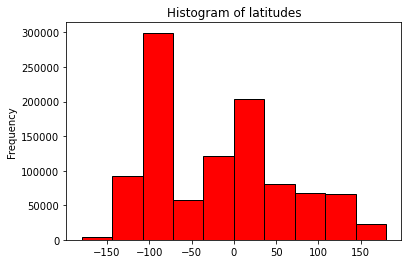

In [5]:
locations.lat.plot.hist(title= 'Histogram of latitudes',color='red',edgecolor='black')

The boxplot and the histogram printed before show the distribution of latitudes of posts locations

number of outliers of lat variable: 96259
max outlier value of lat variable: 89.998698
min outlier value of lat variable: -90.0


<AxesSubplot:>

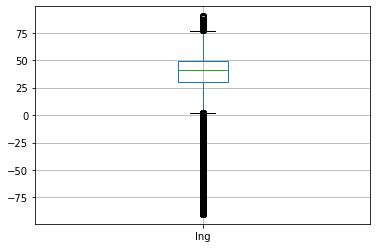

In [27]:
noloc=find_outliers(locations['lng'])
print('number of outliers of lat variable: '+ str(len(noloc)))
print('max outlier value of lat variable: '+ str(noloc.max()))
print('min outlier value of lat variable: '+ str(noloc.min()))

locations.boxplot(column=['lng'])

<AxesSubplot:title={'center':'Histogram of longitudes'}, ylabel='Frequency'>

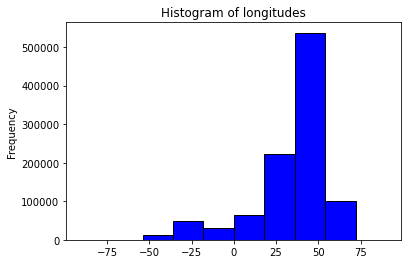

In [6]:
locations.lng.plot.hist(title= 'Histogram of longitudes',color='blue',edgecolor='black')

The boxplot and the histogram printed before show the distribution of longitudes of posts locations

From ranges of the two distribution we understand that probably the two measures have been swapped

In [48]:
for column in locations.columns:
    if locations[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(locations[column].isnull().sum() /
                                               locations[column].shape[0]))

street : 30.02%
zip : 30.03%
city : 8.36%
region : 99.83%
cd : 8.18%
phone : 41.16%
aj_exact_city_match : 2.17%
aj_exact_country_match : 2.17%
blurb : 60.23%
dir_city_id : 51.53%
dir_city_name : 51.53%
dir_city_slug : 51.58%
dir_country_id : 51.54%
dir_country_name : 51.53%
lat : 0.60%
lng : 0.60%
primary_alias_on_fb : 58.39%
slug : 7.92%
website : 39.05%


These are the percentages of null values in each variable. These percentages can be very high like region or blurb

In [23]:
locations_copy=locations.copy()

In [ ]:
locations_copy.street.fillna('', inplace=True)
locations_copy.zip.fillna('', inplace=True)
locations_copy.city.fillna('', inplace=True)
locations_copy.region.fillna('', inplace=True)
locations_copy.cd.fillna('', inplace=True)
locations_copy.phone.fillna('', inplace=True)
locations_copy.aj_exact_city_match.fillna('', inplace=True)
locations_copy.aj_exact_country_match.fillna('', inplace=True)
locations_copy.blurb.fillna('', inplace=True)
locations_copy.dir_city_id.fillna('', inplace=True)
locations_copy.dir_city_name.fillna('', inplace=True)
locations_copy.dir_city_slug.fillna('', inplace=True)
locations_copy.dir_country_id.fillna('', inplace=True)
locations_copy.dir_country_name.fillna('', inplace=True)
locations_copy.primary_alias_on_fb.fillna('', inplace=True)
locations_copy.slug.fillna('', inplace=True)
locations_copy.website.fillna('', inplace=True)
locations_copy.cts.fillna('', inplace=True)
locations_copy.lat.fillna('', inplace=True)
locations_copy.lng.fillna('', inplace=True)

In [55]:
locations_copy.isnull().sum()

sid                       0
id                        0
name                      0
street                    0
zip                       0
city                      0
region                    0
cd                        0
phone                     0
aj_exact_city_match       0
aj_exact_country_match    0
blurb                     0
dir_city_id               0
dir_city_name             0
dir_city_slug             0
dir_country_id            0
dir_country_name          0
lat                       0
lng                       0
primary_alias_on_fb       0
slug                      0
website                   0
cts                       0
dtype: int64

We can replace null values with empty string

### Posts

In [15]:
posts = pd.read_csv('~/instagram_posts.zip', delimiter='\t',usecols = ['numbr_likes','number_comments','post_type'])

To work easily on this large dataset we can import only three variables that can be considered as the most significant variables: number of likes, number of comments and post type (photo, video or both). Other variables are SID, sid_profile, post_id, profile_id, location_id, cts (timestamp when the Post was created
) and description.

number of outliers of number of likes variable: 4288041
max outlier value of number of likes variable: 8822952.0
min outlier value of number of likes variable: 256.0
mean is: 2286.0740841796987
median is: 469.0


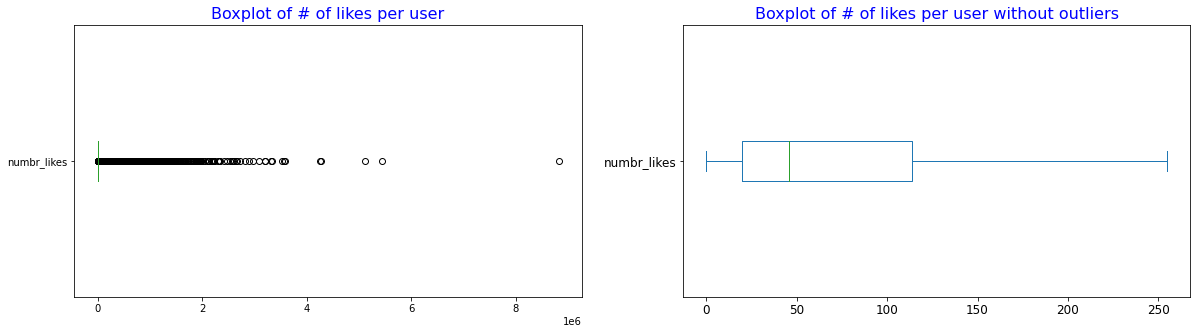

In [20]:
likes_outliers=find_outliers(posts['numbr_likes'])
print('number of outliers of number of likes variable: '+ str(len(likes_outliers)))
print('max outlier value of number of likes variable: '+ str(likes_outliers.max()))
print('min outlier value of number of likes variable: '+ str(likes_outliers.min()))
print('mean is: '+ str(likes_outliers.mean()))
print('median is: '+ str(likes_outliers.median()))
plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Boxplot of # of likes per user", {"fontsize":16, "color":"blue"})
posts.numbr_likes.plot.box(vert = False)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Boxplot of # of likes per user without outliers", {"fontsize":16, "color":"blue"})
posts.numbr_likes.plot.box(showfliers=False, vert = False, fontsize = "large")
plt.show()

Outliers have very high values, the maximum is 8822952.0 likes and mean is 2286 likes and the median is469 likes considering all values

number of outliers of number of likes variable: 4347524
max outlier value of number of likes variable: 488953.0
min outlier value of number of likes variable: 13.0
mean is: 53.79412051549342
median is: 22.0


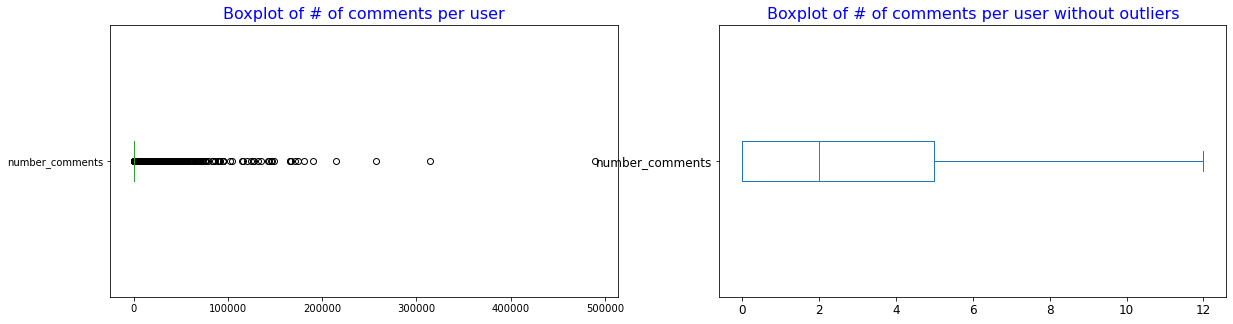

In [21]:
comments_outliers=find_outliers(posts['number_comments'])
print('number of outliers of number of likes variable: '+ str(len(comments_outliers)))
print('max outlier value of number of likes variable: '+ str(comments_outliers.max()))
print('min outlier value of number of likes variable: '+ str(comments_outliers.min()))
print('mean is: '+ str(comments_outliers.mean()))
print('median is: '+ str(comments_outliers.median()))
plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Boxplot of # of comments per user", {"fontsize":16, "color":"blue"})
posts.number_comments.plot.box(vert = False)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Boxplot of # of comments per user without outliers", {"fontsize":16, "color":"blue"})
posts.number_comments.plot.box(showfliers=False, vert = False, fontsize = "large")
plt.show()

In [24]:
print('absolute frequencies: \n' +str(posts.post_type.value_counts()))
print('relative frequencies: \n' +str(posts.post_type.value_counts(normalize=True)))


absolute frequencies: 
1    41534486
2     1134768
3       40943
Name: post_type, dtype: int64
relative frequencies: 
1    0.972472
2    0.026569
3    0.000959
Name: post_type, dtype: float64


As we can see, more than 97% of posts in the dataset are only photos.

# [RQ 2.1] Plot the number of posts for each profile in descending order

We start by showing the data frame sorted by number of posts

In [ ]:
ordered_prof = profiles.sort_values('n_posts',ascending=False)[['profile_id','n_posts']]
display(ordered_prof)


,profile_id,n_posts
3990313,1.996648e+08,183730.0
2571453,8.563367e+09,142428.0
4338921,1.273455e+09,126340.0
3942129,9.813508e+06,125220.0
4219642,1.607309e+09,117262.0
...,...,...
2300812,3.864219e+09,0.0
2300811,5.007520e+09,0.0
2300810,5.430227e+09,0.0
2300809,6.584424e+06,0.0


We can see from the descriptive table that: 
>- the **average number** of posts per user is quite high, and this is probably due to the presence of particularly active users (with high amounts of posts);
>- confirming the statement in the point above, the **standard deviation** (and consequently the variance) is large and makes the average a poor indicator of the population;
>- about **half the population** has a number of posts very close to the minimum value;
>- **25 % of the population** are users who are not very (or not at all) active.

We use the function below to retrieve the most of these infos.

In [ ]:
display(ordered_prof.describe())

,profile_id,n_posts
count,4.477139e+06,4.509586e+06
mean,3.083302e+09,3.135659e+02
std,4.266575e+10,9.280713e+02
min,4.000000e+00,0.000000e+00
25%,2.735177e+08,0.000000e+00
50%,1.649248e+09,4.800000e+01
75%,5.514691e+09,2.870000e+02
max,9.001013e+13,1.837300e+05


<div class="alert alert-block alert-info">
<b>Outlier definition</b>: an outlier is an observation that lies an abnormal distance from other values in a random sample from a population.
</div>

We want to graphcally visualize information about the population through two types of boxplots: 
>- the one on the left represents the entire dataset, including isolated and/or extreme bridges (outlier cases);
>- the second boxplot, on the other hand, provides a better overview, eliminating the distorting effect of outliers and allowing a better visualization of the distribution of posts by users.

From the box plot "free" of the bias of the outliers we can infer information such as quartiles (the three vertical lines represent 25th, 50th, and 75th percentiles, respectively), thus freeing ourselves from the mean, which in this case turns out to be unrepresentative of the population.

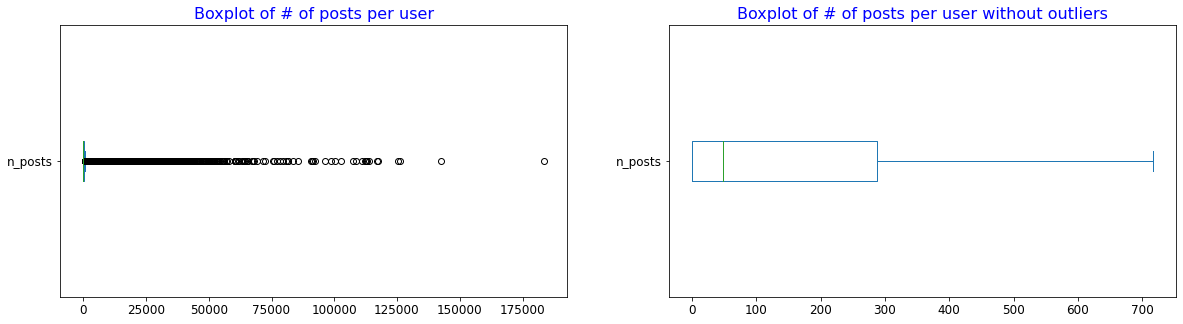

In [ ]:
plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Boxplot of # of posts per user", {"fontsize":16, "color":"blue"})
ordered_prof["n_posts"].plot.box(vert = False, fontsize = "large")

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Boxplot of # of posts per user without outliers", {"fontsize":16, "color":"blue"})
ordered_prof["n_posts"].plot.box(showfliers=False, vert = False, fontsize = "large")
plt.show()

<div class="alert alert-block alert-danger">
<b>WARNING</b>: note that the box plot on the right correctly displays much information but neglects a number of aspects such as the actual extremes of the data set.
</div>

# [RQ 2.2] What posts have the highest number of "likes"?

### Importing the the whole data set "instagram_posts.csv"

In this case we have a huge data set. In order to import every row of __'instagram_posts'__ we select only the columns of interest for each excercise .

In [3]:

posts = pd.read_csv('~/instagram_posts.zip', delimiter='\t',usecols = ['post_id','numbr_likes','number_comments'])


Then we clean the data set as always

In [4]:

posts.post_id.fillna('',inplace=True)
posts.number_comments.fillna(0, inplace=True)
posts.numbr_likes.fillna(0, inplace=True)

#Let's look at the content of the data frame
posts.head(10)

,post_id,numbr_likes,number_comments
0,BXdjjUlgcgq,80.0,0.0
1,BVg0pbolYBC,25.0,1.0
2,BRgkjcXFp3Q,9.0,0.0
3,BKTKeNhjEA7,4.0,0.0
4,8-NQrvoYLX,8.0,0.0
5,BrYDPJeABJQ,138.0,15.0
6,BmQ418mgSnL,389.0,10.0
7,Bm1YQ3Hn1gJ,198.0,23.0
8,2qBVjbTgzi,127.0,8.0
9,BP5ViC6gaEf,154.0,6.0


In [5]:
# sorting by number of likes
posts.sort_values('numbr_likes', ascending=False).head(10)

,post_id,numbr_likes,number_comments
19624085,Bt3yaXmAM0d,8822952.0,165886.0
19623988,BuwffB7g8cK,5447066.0,25303.0
19624082,Buc1gyZAaMQ,5116398.0,40608.0
19623986,BvcukE8AMuG,4271466.0,30770.0
39701024,BqSLFVBFLfq,4264745.0,18691.0
6293907,BwTSXBKg7gN,3586546.0,15405.0
19624086,Btw8pFXAvQm,3558599.0,15715.0
19802016,BvC3n6_gqin,3533326.0,59475.0
30850564,Bw7vqLrFkHi,3340297.0,149489.0
39812576,Bw2gTH1AiDA,3311246.0,64318.0


# [RQ 2.3] What posts have the most and the least number of comments?


In [6]:
# Displaying the 10 most commented posts
posts.sort_values('number_comments', ascending=False).head(10)

,post_id,numbr_likes,number_comments
41873060,Bx2sPAjHviO,38871.0,488953.0
12164781,BuGjhWAhAW5,81523.0,313997.0
33261751,BJ-rkpTgn1N,54507.0,257488.0
11149127,BMtisIxjhtT,331703.0,214365.0
9383817,BzOOWj3DfZK,23515.0,189888.0
5427268,BoQoM-JFkPA,129258.0,180635.0
25257169,Bwarws1lCok,684861.0,173988.0
6220011,Bt4qlVDAZMH,2224495.0,170836.0
31689573,Bs9NhQkAcJA,226336.0,166919.0
14257307,Bzqb95QI_1E,169791.0,166198.0


In [7]:
# Displaying the 10 least commented posts
posts.sort_values('number_comments').head(10)

,post_id,numbr_likes,number_comments
0,BXdjjUlgcgq,80.0,0.0
11118493,BulP9Cgl_w3,23.0,0.0
11118494,BuPOlbNl1wc,27.0,0.0
11118496,BuBNGbLFCoA,24.0,0.0
11118497,BtmABtrFM85,23.0,0.0
11118499,BwtgkWmF0-a,42.0,0.0
11118501,BrXso1BlvO9,18.0,0.0
28429740,Bt9yiYjhIyi,43.0,0.0
11118505,BnnbljUBOpd,45.0,0.0
28429739,Bt90U7ilqrO,69.0,0.0


Given the fact that probably a lot of posts have the least number of comments (0 comments), we would know the effective number of possts with no comments

In [10]:
# Remark: we replaced every number_comments 'na' with the 0 value  
posts[posts['number_comments']==0]

,post_id,numbr_likes,number_comments
0,BXdjjUlgcgq,80.0,0.0
2,BRgkjcXFp3Q,9.0,0.0
3,BKTKeNhjEA7,4.0,0.0
4,8-NQrvoYLX,8.0,0.0
11,Bx-ptmpinBs,16.0,0.0
...,...,...,...
42710190,BpeRbppFQ2l,43.0,0.0
42710191,Bdx3o7WDypu,149.0,0.0
42710192,BcpWMWGBfxh,74.0,0.0
42710193,Ba6LZWwlCl8,49.0,0.0


# [RQ 2.4] How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results


Partially importing the data set

In [ ]:
posts = pd.read_csv('~/instagram_posts.zip', delimiter='\t',usecols = ['location_id','post_type'])

Cleaning the data set

In [ ]:
posts.location_id.fillna('',inplace=True)
posts.post_type.fillna(0, inplace=True)

In [ ]:
# Building the data-frame only with posts without location tag
no_location = posts[posts['location_id']=='']
count_notag = no_location.shape[0]
count_tag = posts.shape[0] - count_notag
print("The number of posts without location tag is:", count_notag)
print("The number of posts with location tag is:", count_tag)

The number of posts without location tag is: 12972772


The sample of posts clearly presents a majority (69,4%) of posts with location tags, and this grants a number of food for thought: 

>- on the social media under consideration, the relationship between publishing a post and referring to a specific location is fundamental, thus benefiting businesses in particular such as those in the restaurant industry and those related to places and events;

>- the almost ubiquitous presence of a location tag allows for the analysis of the level of services and popularity of a specific context and serves as a catalyst for price/service discrimination offered based on a predictive study of users.

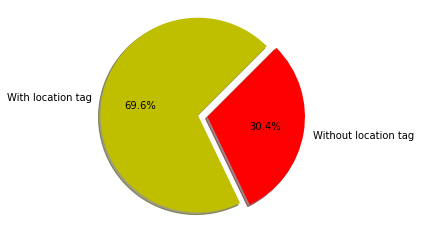

In [ ]:

labels = 'With location tag', 'Without location tag'
sizes = [count_tag, count_notag]
explode = (0, 0.1)  # "explode" the 'Without location tag' slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=45, colors=('y','r'))
ax1.axis('equal')  

plt.show()

# [RQ 2.5] How many posts include only photos? How many also have videos?

In [ ]:
# counting posts for each category of post

photo_count = posts[posts['post_type']==1].shape[0]
video_count = posts[posts['post_type']==2].shape[0]
multi_count = posts[posts['post_type']==3].shape[0]

print("The number of posts containing photos only is:",photo_count)
print("In addition the number of posts containing photos and videos is:",multi_count)

The number of posts containing photos only is: 41534486
In addition the number of posts containing photos and videos is: 40943


Users clearly prefer to carry content in a unique format and prefer photos to videos (preferences will likely have been skewed by Tik Tok's growth in popularity in recent years).

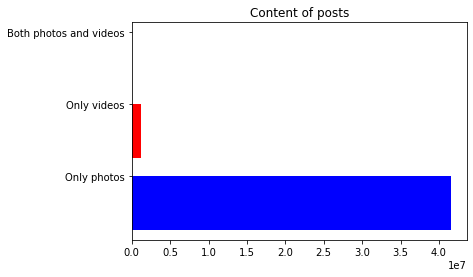

In [ ]:
labels = ['Only photos', 'Only videos', 'Both photos and videos']
counts = [photo_count, video_count, multi_count]

fig, ax = plt.subplots()    
width = 0.75
ind = np.arange(len(counts))  # the x locations for the groups
ax.barh(ind, counts, width, color=('b', 'r', 'g'))
ax.set_yticks(ind+width/2)
ax.set_yticklabels(labels, minor=False)
plt.title('Content of posts')
      
plt.show()

The proportions between the quantities of posts of the 3 categories do not allow a clean visualization of information in the bar plot above. We have huge differencies between them and the photo is the predominant type content in this social (consistent with its historical background and early form of publication).

# [RQ 2.6] What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

In [ ]:
# counting the business accounts

business = profiles[profiles['is_business_account']==True].shape[0]
tot = profiles.shape[0]
not_business = tot - business

print("The number of business accounts is:",business, (business/tot)*100," of the accounts")

The number of business accounts is: 855254


Despite the presence of multiple fake, disused, or simple bot accounts, the business option affects a significant portion of users.

This means that many profiles use instagram to make a profit and/or for advertising purposes: 19% of the sample monetize with their account or otherwise find it profitable to pay for a premium service to sponsor themselves or the company they work for. 
The figure is relevant to highlight two main aspects:
>- a good portion of what we see has the pure purpose of introducing us to a particular product or service;

>- instagram, like most social media, is probably most useful for carrying out marketing strategies. 

<div class="alert alert-block alert-danger">
<b>WARNING</b>: The reasoning we have arrived at could be alarming because anything that is closely related to the world of business and consumerism often departs from an objective view of the world. Instead, more room is given to market manipulation, customer study and objectification of reality!
</div>

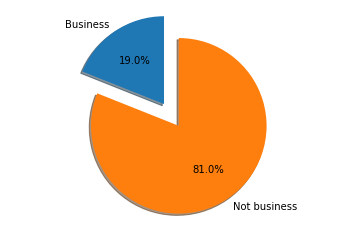

In [ ]:
labels = 'Business', 'Not business'
sizes = [business, not_business]
explode = (0.3, 0)  # "explode" the 'Without location tag' slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

<div class="alert alert-block alert-warning">
<b>RESULT:</b> This explains why instagram turns out to be an unfriendly place for the formation of united and supportive commuinities (unlike, for example, Reddit) and is rampant with fake news and anccount scams. When deriving information from sources related to increased money circulation and broad speculative interests one must always measure the sincerity of the user and avoid comparing oneself and one's life with ad hoc created accounts on this platform
</div>

# [RQ 3.1] What is the most common time in which users publish their posts?

For this excercise we only need the 'cts' attribute

In [12]:
posts = pd.read_csv('instagram_posts.zip', delimiter='\t',usecols = ['cts'])

In [13]:
# converting the cts attribute in date time
posts.cts = pd.to_datetime(posts['cts'])
posts.dropna(subset=['cts'],inplace=True)
posts.dtypes # to verify that we correctly casted our 'cts' attribute

cts    datetime64[ns]
dtype: object

In [6]:
# using Counter in order to detect the most common date time

datetimes = posts['cts'].dt.time
counter = Counter(datetimes)
most_used = counter.most_common(1)
print("The most common time in which users publish their posts is:", most_used[0][0])
print("The published posts at this time are:", most_used[0][1])

The most common time in which users publish their posts is: 21:00:09
The published posts at this time are: 928


In [ ]:
# we could interpretate the output of the excercise as the most common time slot (i.e. most common hour) 

datetimeh = posts['cts'].dt.hour
counter = Counter(datetimeh)
most_used = counter.most_common(1)
print("The most common hour in which users publish their posts is:", most_used[0][0])
print("The published posts at this hour are:", most_used[0][1])

The most common hour in which users publish their posts is: 19
The published posts at this hour are: 2499758


In [ ]:
# we stringify the datetime objects in order to split in an easy way (only one step per row) the 'datetime' serie
# and expand it in a data frame of 3 columns
datetimes.astype(str)
datetimes = pd.Series(datetimes, dtype="string")
datetimes = datetimes.str.split(":",expand=True,)



KeyboardInterrupt



### In the following histogram we plot the concentration of published posts by time slot

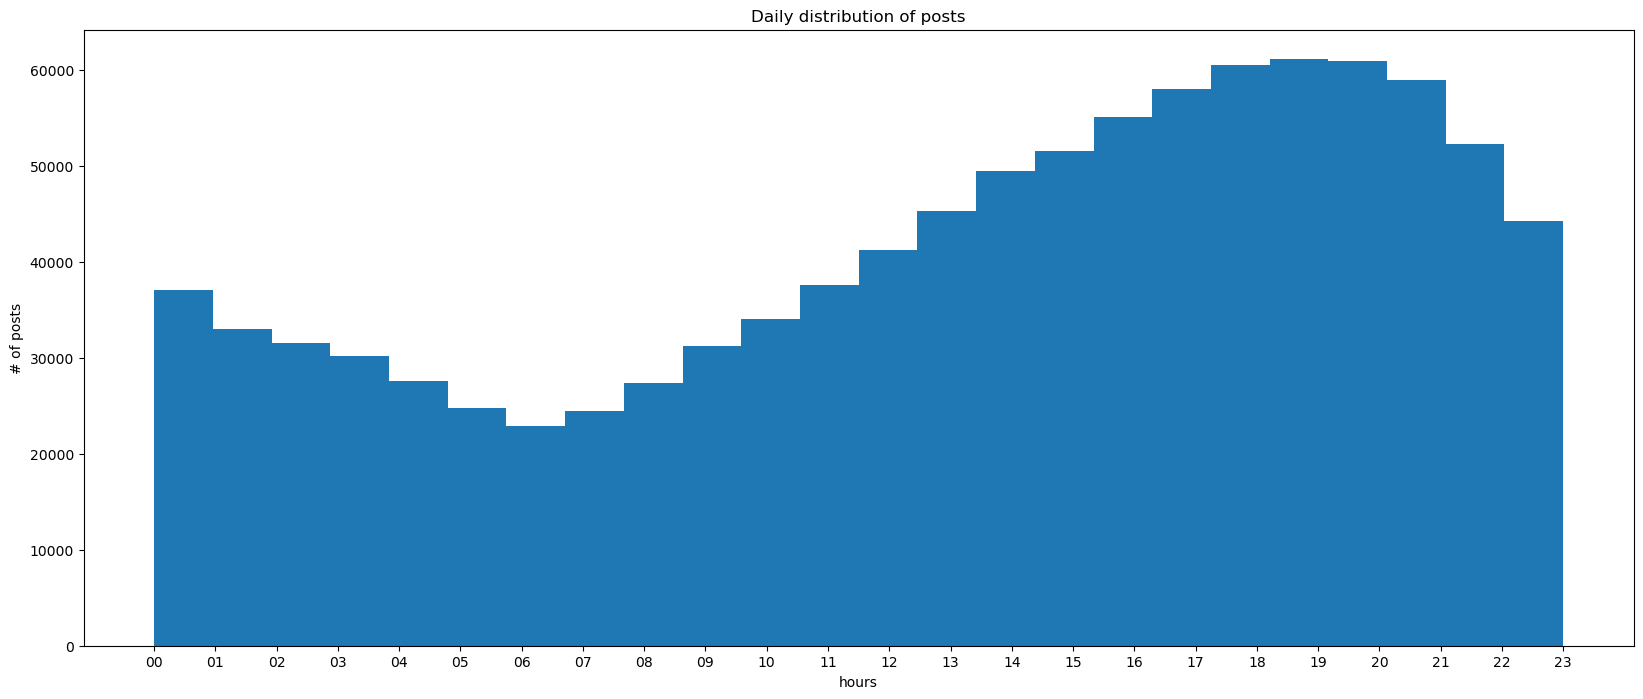

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Daily distribution of posts')
plt.xlabel('hours')
plt.ylabel('# of posts')
 
plt.hist(datetime[0].sort_values(), bins=24)
plt.show()

We can clearly see an increasing publication of posts in the afternoon/evening (4:00 p.m. to 10:00 p.m.).
This concentration is probably due to the possibility of prolonged access to social during non-work or non-school hours. During the night the activity does not stop but slows down.

<div class="alert alert-block alert-warning">
<b>RESULT:</b> you can use this information to analyze the right time to publish a post and make an initial rough prediction about the possible visibility of the post.
</div>

# [RQ 3.2] Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval

We want to write a function that plots the number of posts at the different times of the day given as input. We assume that the times are not in general of equal length and that each interval is defined by two times (one beginning and one ending interval).

<div class="alert alert-block alert-danger">
<b>WARNING</b>: we don't use the 'hist' function like in the histogram above since we have not necessarly intervals of the same length or that cover the whole daytime.
</div>

Our function takes in input:
>- our 'datetimes' serie with the time of publication of every post in the posts dataframe;
>- a list of tuples, each tuple contains two strings (respectively the start time and the end time of a single interval) in the format 'hours:minutes:seconds'.

Let's introduce a trivial example with 2 large intervals of time. We'll see that, according to the histogram at the end of the excercise 3.1, during the second time interval a lot of posts are published (in particular compared with the first interval).

We note that the the discrepancy in the 2 intervals is given both by the different widths of these and by the time of reference. 

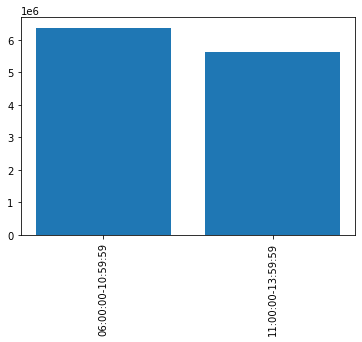

In [7]:
# testing the function above
from functions import *
time_intervals = [('06:00:00','10:59:59'),('11:00:00', '13:59:59')]
numb_posts = functions.posts_by_interval(time_intervals, datetimes)
plt.bar(np.array([str(interval[0]) + '-'+str(interval[1]) for interval in time_intervals]), numb_posts)
plt.xticks(rotation=90)
plt.show()


# [RQ 3.3] Use the function that you created in the previous literal to plot the number of posts between the following time intervals


In [8]:
time_intervals = [('06:00:00','10:59:59'),('11:00:00', '13:59:59'),('14:00:00','16:59:59'),('17:00:00', '19:59:59'),('20:00:00', '23:59:59'),('00:00:00', '02:59:59'),('03:00:00', '05:59:59')]

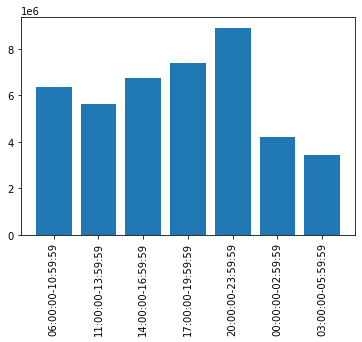

The number of posts published in the time interval ('06:00:00', '10:59:59') is 6378572
The number of posts published in the time interval ('11:00:00', '13:59:59') is 5614715
The number of posts published in the time interval ('14:00:00', '16:59:59') is 6763037
The number of posts published in the time interval ('17:00:00', '19:59:59') is 7409907
The number of posts published in the time interval ('20:00:00', '23:59:59') is 8915794
The number of posts published in the time interval ('00:00:00', '02:59:59') is 4213617
The number of posts published in the time interval ('03:00:00', '05:59:59') is 3411223


In [9]:
#plotting the # of posts per interval time using the function from the previus point

numb_posts = posts_by_interval(time_intervals, datetimes)
plt.bar(np.array([str(interval[0]) + '-'+str(interval[1]) for interval in time_intervals]), numb_posts)
plt.xticks(rotation=90)
plt.show()

for i in range(len(time_intervals)):
    print(f"The number of posts published in the time interval {time_intervals[i]} is {numb_posts[i]}")

Obviously we have to assume that the distribution of these times of publication of posts are refer to a unique time zone. In absence of this assumption the result above is not really relevant

The correctness of the result can be inferred through consistency with what we obtained in the histogram of exercise 3.1:

>- we have a max of activity in the late afternoon/ after dinner time;

>- at the first hours in the morning we have a distinct lack of activity.

# [RQ 4.1] Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id

With the function below we extract all over the rows in the 'posts' data frame wich correspond to the profile id passed as agrument of the function

In [4]:
# we partially import the data sets for this excercise
profiles = pd.read_csv('~/instagram_profiles.zip', delimiter='\t',usecols = ['profile_id','n_posts'])

In [5]:
posts = pd.read_csv('~/instagram_posts.zip', delimiter='\t',usecols = ['profile_id','numbr_likes','number_comments'])

the function posts_by_profileid returns the posts published by the user passed as argument

In [6]:
# testing the function
functions.posts_by_profileid(553970442.0,posts)

,profile_id,numbr_likes,number_comments
940554,553970442.0,1043.0,10447.0
940555,553970442.0,24.0,1.0
940556,553970442.0,1653.0,11391.0
940557,553970442.0,3580.0,20671.0
940570,553970442.0,35.0,0.0
940571,553970442.0,27.0,0.0
940572,553970442.0,46.0,0.0
940573,553970442.0,41.0,0.0
940574,553970442.0,11.0,0.0
940575,553970442.0,38.0,0.0


# [RQ 4.2] Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function

Let's start with some little changes to the _posts_by_profileid_ function: we want a new function that takes a list of profiles and returns all the posts published by one of these profiles

The function posts_by_profileid2 returns all the posts that are published by an user that is present in the list passed as argument.
The only difference from the funtion above is the argument passed: in this case is a list of profile ids

In [10]:
# testing the function above with simply a list of length 2
functions.posts_by_profileid2([4731970969.0,553970442.0],posts)

,profile_id,numbr_likes,number_comments
313806,4.731971e+09,1963123.0,53878.0
940554,5.539704e+08,1043.0,10447.0
940555,5.539704e+08,24.0,1.0
940556,5.539704e+08,1653.0,11391.0
940557,5.539704e+08,3580.0,20671.0
940570,5.539704e+08,35.0,0.0
940571,5.539704e+08,27.0,0.0
940572,5.539704e+08,46.0,0.0
940573,5.539704e+08,41.0,0.0
940574,5.539704e+08,11.0,0.0


Now the function influencers_posts takes in input an integer an returns all the posts of the most 'active' profiles
Thus we use a combination with the function decribed in the cells above

In [12]:
# we want to show with this dataframe display that not all over the users' posts are present in the posts dataframe
# in the example below we check all the posts in 'posts' data set posted by the user profile with the highest number of posts
functions.posts_by_profileid(199664772.0,posts)

# clearly we have few of his posts

,profile_id,numbr_likes,number_comments
9592952,199664772.0,0.0,0.0
9592953,199664772.0,0.0,0.0
9592954,199664772.0,27.0,0.0
9592955,199664772.0,28.0,0.0
9592956,199664772.0,1.0,0.0
9592957,199664772.0,7.0,0.0
9592958,199664772.0,3.0,0.0
9592959,199664772.0,1.0,0.0
9592960,199664772.0,19.0,0.0
9592961,199664772.0,11.0,0.0


In [14]:
display(functions.influencers_posts(10,profiles,posts))

,profile_id,numbr_likes,number_comments
233067,1.607309e+09,1.0,0.0
241977,1.607309e+09,0.0,0.0
319192,1.607309e+09,4.0,0.0
494943,1.603890e+09,4.0,0.0
592982,1.087614e+09,0.0,0.0
...,...,...,...
41291586,1.607309e+09,3.0,0.0
42044048,1.607309e+09,1.0,0.0
42154726,1.603890e+09,36.0,0.0
42240454,1.603890e+09,4.0,0.0


# [RQ 4.3] What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

In [15]:
# the function returns the mean number of likes that the top 10 influencers gain in their posts
functions.influencers_posts(10,profiles,posts).groupby('profile_id').numbr_likes.mean()

profile_id
9.813508e+06    0.296296
1.996648e+08    7.666667
2.181730e+08    0.400000
2.855497e+08    3.921875
1.087614e+09    2.026316
1.273455e+09    2.960000
1.603890e+09    6.477612
1.607309e+09    1.540541
8.563367e+09    0.000000
Name: numbr_likes, dtype: float64

In [16]:
# the function returns the mean number of comments that the top 10 influencers gain in their posts
functions.influencers_posts(10,profiles,posts).groupby('profile_id').number_comments.mean()

profile_id
9.813508e+06    0.000000
1.996648e+08    0.000000
2.181730e+08    0.040000
2.855497e+08    0.000000
1.087614e+09    0.184211
1.273455e+09    0.040000
1.603890e+09    0.044776
1.607309e+09    0.000000
8.563367e+09    0.000000
Name: number_comments, dtype: float64

# [RQ 4.4] Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart

In [17]:
posts = pd.read_csv('~/instagram_posts.zip', delimiter='\t',usecols = ['profile_id','cts'])

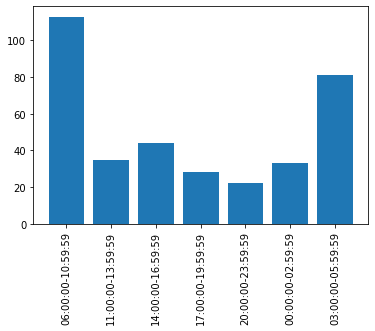

The number of posts published in the time interval ('06:00:00', '10:59:59') is 113
The number of posts published in the time interval ('11:00:00', '13:59:59') is 35
The number of posts published in the time interval ('14:00:00', '16:59:59') is 44
The number of posts published in the time interval ('17:00:00', '19:59:59') is 28
The number of posts published in the time interval ('20:00:00', '23:59:59') is 22
The number of posts published in the time interval ('00:00:00', '02:59:59') is 33
The number of posts published in the time interval ('03:00:00', '05:59:59') is 81


In [24]:
# converting the cts attribute in date time
posts.cts = pd.to_datetime(posts['cts'])
posts.dropna(subset=['cts'],inplace=True)
# we want to plot the number of posts published during the given intervals of time 
time_intervals = [('06:00:00','10:59:59'),('11:00:00', '13:59:59'),('14:00:00','16:59:59'),('17:00:00', '19:59:59'),('20:00:00', '23:59:59'),('00:00:00', '02:59:59'),('03:00:00', '05:59:59')]
datetimes = functions.influencers_posts(10,profiles,posts).cts.dt.time
numb_posts = functions.posts_by_interval(time_intervals, datetimes)

# now we use the same function used in the point 3.3 
plt.bar(np.array([str(interval[0]) + '-'+str(interval[1]) for interval in time_intervals]), numb_posts)
plt.xticks(rotation=90)
plt.show()

for i in range(len(time_intervals)):
    print(f"The number of posts published in the time interval {time_intervals[i]} is {numb_posts[i]}")

Analyzing the time of publication of the most active users have a slightly different time schedule with respect the average. The highest volume of posts is in the morning instead of the evening as we saw before for all profiles. This can be related to a different use of this social network more linked to a job vision.

# [RQ 5.1] Plot the top 10 most popular users in terms of followers and their number of posts

In [25]:
profiles = pd.read_csv('~\instagram_profiles.zip',delimiter='\t')
sorted_by_followers = profiles.sort_values('followers', ascending=False)
sorted_by_followers[['profile_id','n_posts','followers']].head(10)

,profile_id,n_posts,followers
2880218,2.502532e+07,5760.0,285457645.0
2582507,3.416684e+06,7355.0,65269440.0
3820939,2.082449e+07,28816.0,35339708.0
701965,1.876191e+08,3352.0,30689316.0
2414951,2.125507e+09,2791.0,30246783.0
2785241,4.968651e+08,990.0,29542143.0
333193,2.341008e+07,4566.0,29176804.0
3934581,2.423993e+07,4719.0,29042823.0
1311970,5.041706e+07,1311.0,26476004.0
1703764,9.070254e+08,1173.0,26252169.0


Now we could be interested in the analysis of the relationship between number of posts published and number of followers

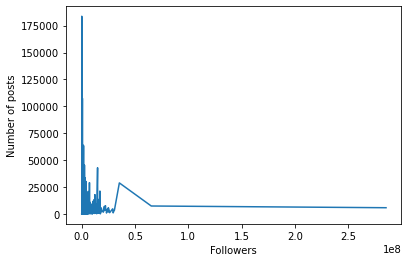

In [26]:
plt.plot(sorted_by_followers.followers, sorted_by_followers.n_posts)
plt.xlabel('Followers')
plt.ylabel('Number of posts')
plt.show()

The trend in the number of posts as a function of followers is not as monotonous as we expected. In fact, there are many profiles that despite having a lower number of followers turn out to be more active.

In fact, the maximum number of published posts is reached by users with fewer followers giving rise to a large discrepancy.
Evidently, in general, the most followed users prefer to prioritize quality of content over mere online presence. Certainly bot accounts and outliers represent a spike in posts given the continuous spamming of centers and/or failure to revise posts published in the past

# [RQ 5.2] Who is the most influential user?

The user that has the highest number of followers can be seen as the most influential one

In [27]:
sorted_by_followers.profile_id.head(1)

2880218    25025320.0
Name: profile_id, dtype: float64

# [RQ 5.3] Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited

In order to exploit the information from the posts of the most influential users we can now define a variation of the function _'influencers_posts'_ of the exercise 4.2. In this case we grasp the posts published by the profiles with the highest number of followers (instead of the highest number of posts)

In [28]:
posts = pd.read_csv('~\instagram_posts.zip',delimiter='\t', usecols = ['profile_id','location_id','post_type'])

The function influencers_posts2 takes in input an integer n and returns a dataframe of posts

In [29]:
# we are finding the locations tagged in the posts of the 10 most popular users (in terms of followers)
famous_locations = functions.influencers_posts2(10,profiles,posts)['location_id'].tolist()
famous_locations

[5332856.0,
 587387369.0,
 877066659067597.0,
 629488.0,
 350021298.0,
 1653066228336077.0,
 524311966.0,
 711348463.0,
 795373023.0,
 384619115.0,
 2193902.0,
 177643359427566.0,
 1021722711.0,
 222244450.0,
 116531305845344.0,
 733213680.0,
 927381377419380.0,
 495865697430886.0,
 302631549.0,
 234317128.0,
 873036082898953.0,
 592482131.0,
 248557125.0,
 261122325.0,
 212948930.0,
 302612476852048.0,
 236828105.0,
 1000244926778781.0,
 229302869.0,
 288135278570406.0,
 645178265.0,
 278386894.0,
 216366531.0,
 216904119.0,
 214316284.0,
 214029549.0,
 968631346.0,
 239452040.0,
 69752042.0,
 1839666952713295.0,
 277468932.0,
 589320006.0,
 3108364.0,
 165700643580577.0,
 213011753.0,
 255009.0,
 213011753.0,
 213011753.0,
 213011753.0,
 213011753.0,
 213011753.0,
 213011753.0,
 213011753.0,
 213011753.0,
 1906910439594849.0,
 1906910439594849.0,
 nan,
 1731497986866121.0,
 nan,
 213884067.0,
 nan,
 850954138.0,
 561063437.0,
 nan,
 1731497986866121.0,
 212901056.0,
 217271987.0,
 na

In [30]:
# we are counting the number of posts that tag one of the most famous locations
counting = posts[posts['location_id'].isin(famous_locations)].groupby('location_id').count().reset_index()
counting = counting[['location_id', 'profile_id']]
counting.columns = ['location_id', 'counts']
display(counting)

,location_id,counts
0,1.793700e+05,450
1,2.550090e+05,41
2,4.292640e+05,34
3,6.294880e+05,35
4,2.193902e+06,33
...,...,...
87,1.731498e+15,4
88,1.839667e+15,24
89,1.906910e+15,311
90,1.991139e+15,10


Once we have found the location id of the posts published by the most famous users, let's import the locations csv in order to find the cities that correspond to the tagged location id.

In [50]:
locations =  pd.read_csv('~\instagram_locations.zip',delimiter='\t')

In [52]:
# cleaning the data set
locations.sid.fillna('-1',inplace=True)
locations.id.fillna('-1',inplace=True)
locations.name.fillna('',inplace=True)
locations.street.fillna('',inplace=True)
locations.city.fillna('unknown location',inplace=True)
locations.region.fillna('',inplace=True)
locations.cd.fillna('',inplace=True)
locations.phone.fillna('',inplace=True)
locations.dir_city_name.fillna('',inplace=True)
locations.dir_city_slug.fillna('',inplace=True)
locations.dir_country_id.fillna('',inplace=True)
locations.dir_country_name.fillna('',inplace=True)
locations.website.fillna('',inplace=True)
locations.primary_alias_on_fb.fillna('',inplace=True)
locations.head(10)

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",,NaN,unknown location,,,,False,...,,,,,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,,NaN,Nová Vieska,,SK,,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,,nova-vieska,,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",,NP,,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",,US,(818) 569-7500,False,...,,,,,-118.341864,34.153265,,abc-cable-networks-group,,2019-04-02 15:22:55.703
5,326440,242403516699715,The Lakes at Discovery Bay,,NaN,unknown location,,,(925) 308-3883,NaN,...,,,,,-121.621549,37.925412,TheLakesatDiscoveryBay,the-lakes-at-discovery-bay,www.TheLakesatDiscoveryBay.com,2019-04-02 15:22:55.367
6,719988,1651686855080719,"Tampines, Singapore",Tampines,529941,Singapore,,SG,,False,...,,,,,103.949729,1.355203,TampinesZingapurA,tampines-singapore,,2019-05-29 01:21:56.635
7,719992,240487083,Sittano’s Bar & Restaurant,"Shop R03 Westfield Penrith, Level 1 / Riley St...",2750,"Penrith, New South Wales",,AU,0247224444,False,...,Penrith,penrith,AU,Australia,150.694367,-33.751031,Sittanos,sittanos-bar-restaurant,http://www.sittanos.com.au/,2019-05-29 01:22:12.909
8,719996,750669435108256,วัดท่าซุง อุทัยธานี,3212,61000,"Nam Soem, Uthai Thani, Thailand",,TH,0854623871,False,...,,,,,100.073586,15.329776,,NaN,http://www.watthasung.com,2019-05-29 01:22:27.749
9,719998,223283275,Cine Atlas,Hatanpään valtatie 1,33100,"Tampere, Finland",,FI,,False,...,,,,,23.766263,61.495690,,cine-atlas,http://www.finnkino.fi/cinemas/tampere_cine_atlas,2019-05-29 01:22:35.936


In [53]:
# finding the cities referred to the most famous lacations
cities = locations[locations['id'].isin(famous_locations)].city.str.split(',',expand=True)[0]
cities

2409              Akron
15701           Houston
24242           Kowloon
38348      Boulder City
45317         Singapore
               ...     
1004275           Parks
1007763         Houston
1011948            Lodi
1012495        New York
1014589       Blangpidi
Name: 0, Length: 92, dtype: object

We interpreted the excercise as finding the number of times that people (in general) visited the cities associated to the locations tagged by the 10 most popular users.
This result cuold be intersting in terms of measuring the impact of a social media abount the popularity of a place.
The most popular users can be seen as 'vestors': through their habits, their routines, behaviour and opinions they can inluence/manipulate the others. In this case people simply tend to visit the most 'sposored' places.

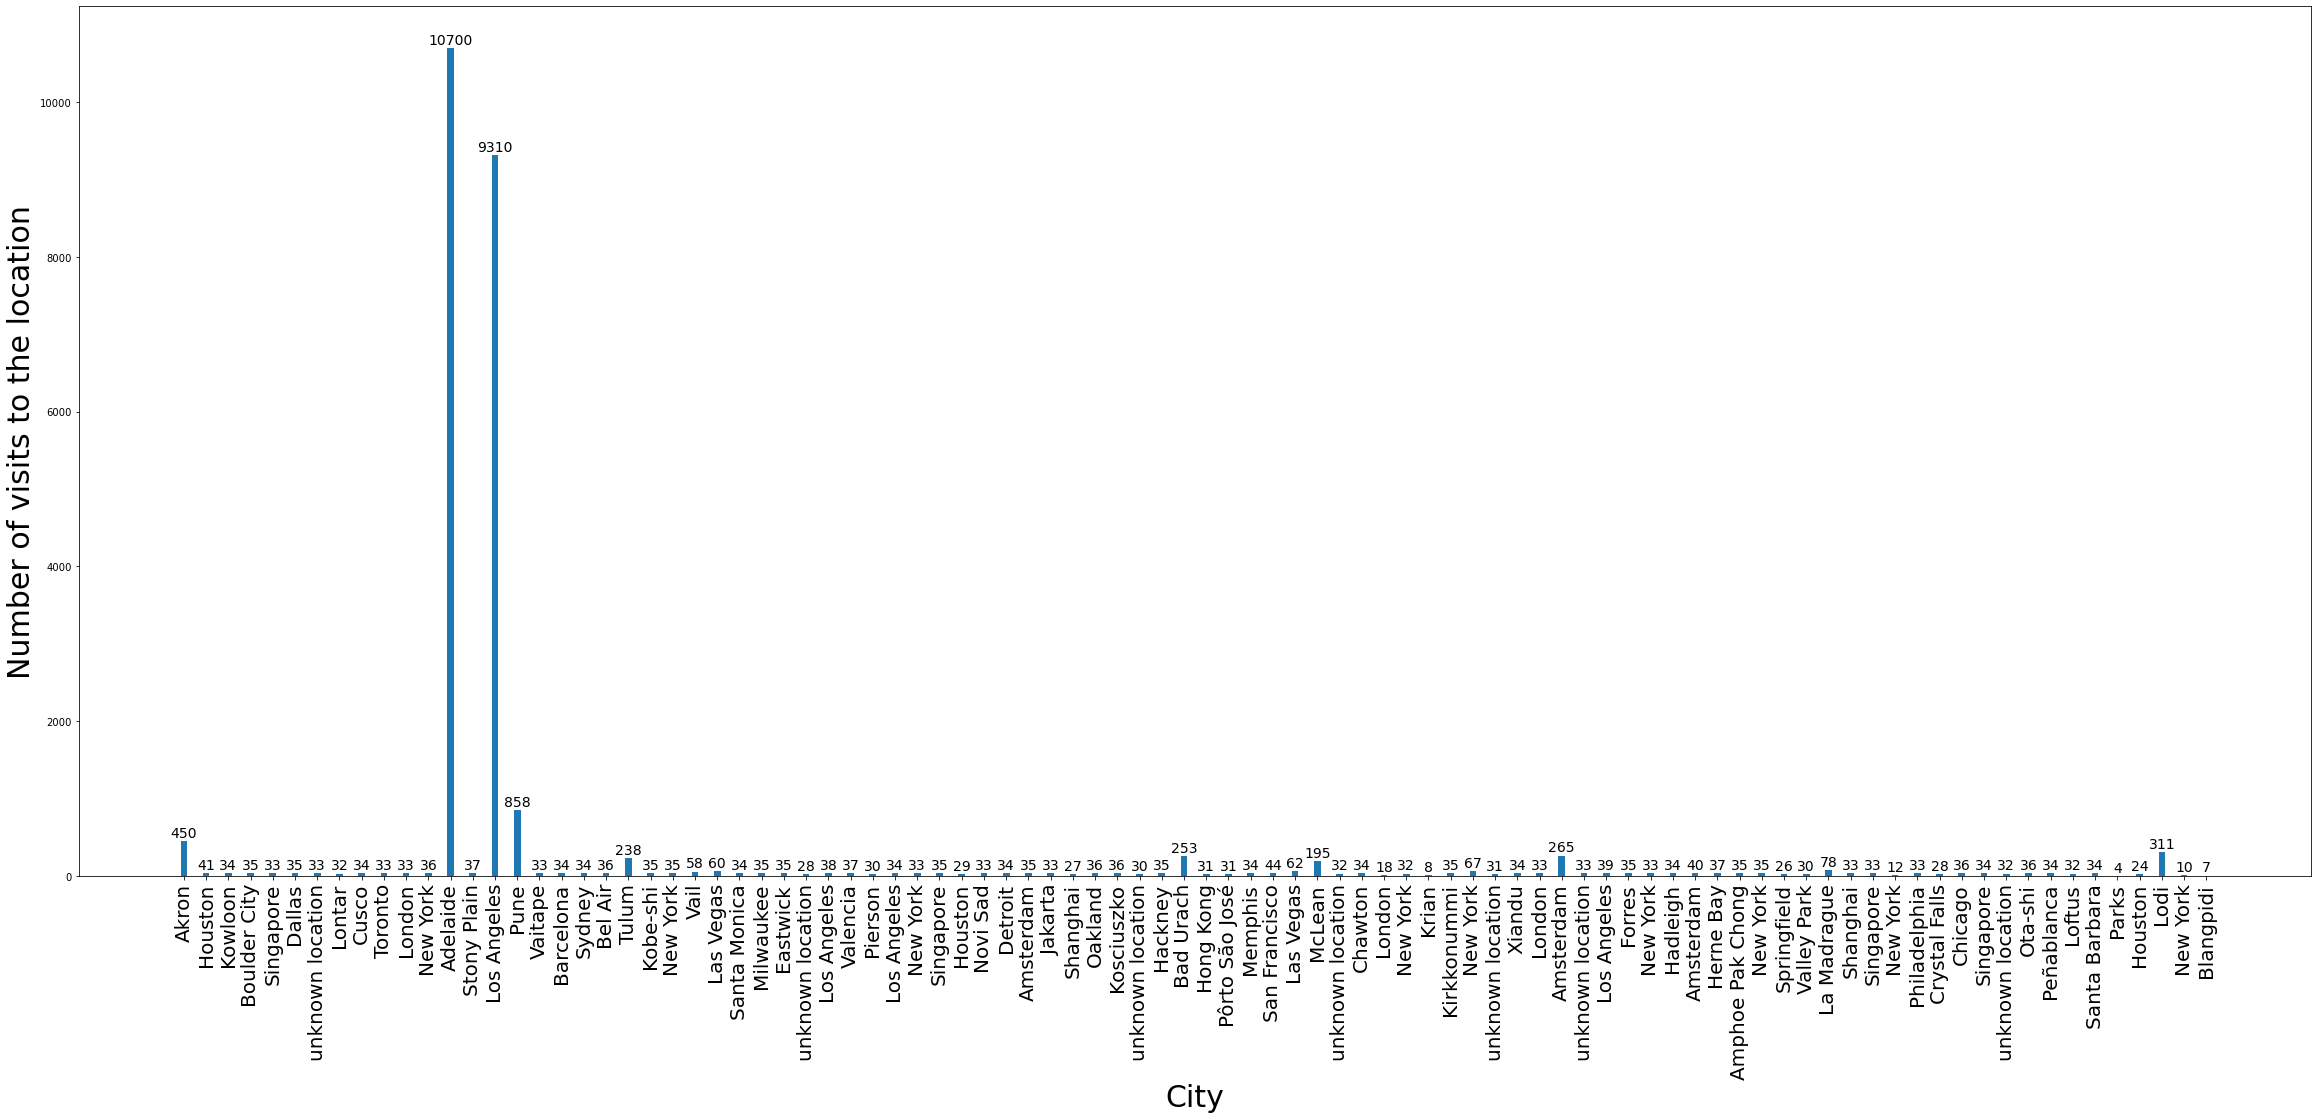

In [68]:
# finally we can plot the number of times that the cities visited by the influencers are visited by the rest of people
plt.figure(figsize=(40, 16))
labels = cities.tolist()
x = np.arange(counting.shape[0])
y = counting.counts.tolist()
width = 0.3
rects1 = plt.bar(x, y, width)
plt.ylabel('Number of visits to the location',fontsize=30)
plt.xlabel('City',fontsize=30)
plt.xticks(x, labels, rotation=90,fontsize=20)

plt.bar_label(rects1, padding=1,fontsize=14)


fig.tight_layout()

plt.show()


# [RQ 5.4] How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures

For this point we decided to use the same code written for the point 5 of RQ2, but applied only to posts published by the most followed users

In [71]:
# init the posts published my the 10 most popular users
infl_posts = functions.influencers_posts2(10,profiles,posts)

# categorizing the posts above by type of post and counting them
photo_count = infl_posts[infl_posts['post_type']==1].shape[0]
video_count = infl_posts[infl_posts['post_type']==2].shape[0]
multi_count = infl_posts[infl_posts['post_type']==3].shape[0]
tot = photo_count + video_count + multi_count
print(f'The number of posts containing photos only is: {photo_count} --> {(photo_count/tot)*100}% of posts')
print(f'The number of posts containing videos only is: {video_count} --> {(video_count/tot)*100}% of posts')
print(f'In addition the number of posts containing photos and videos is: {multi_count} --> {(multi_count/tot)*100}% of posts')

The number of posts containing photos only is: 128 --> 90.78014184397163% of posts
The number of posts containing videos only is: 13 --> 9.219858156028367% of posts
In addition the number of posts containing photos and videos is: 0 --> 0.0% of posts


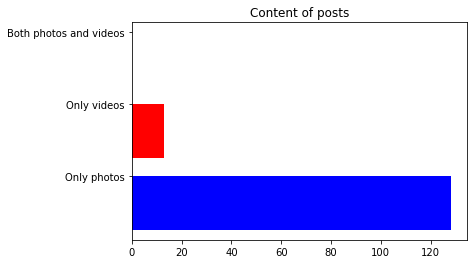

In [72]:
labels = ['Only photos', 'Only videos', 'Both photos and videos']
counts = [photo_count, video_count, multi_count]

fig, ax = plt.subplots()    
width = 0.75
ind = np.arange(len(counts))  # the x locations for the groups
ax.barh(ind, counts, width, color=('b', 'r', 'g'))
ax.set_yticks(ind+width/2)
ax.set_yticklabels(labels, minor=False)
plt.title('Content of posts')
      
plt.show()

This plot is easy to compare with the plot from the point 2.5: we can see that the propotions between type of posts is the same, probably because of the fact the these posts are published by the most pop inluencers, thus they lead the trend on this platform.

# [RQ 5.5] How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison

In [73]:
posts = pd.read_csv('instagram_posts.zip',delimiter='\t', usecols = ['profile_id','numbr_likes','post_type','number_comments'])

In [74]:
# init the posts published my the 10 most popular users
infl_posts = functions.influencers_posts2(10,profiles,posts)
display(infl_posts)

,profile_id,post_type,numbr_likes,number_comments
266570,25025320.0,1,125428.0,1240.0
659635,25025320.0,1,669786.0,4818.0
1441841,25025320.0,1,1914299.0,20065.0
1559527,20824486.0,1,164521.0,1415.0
2410579,25025320.0,1,840588.0,3627.0
...,...,...,...,...
41532427,25025320.0,1,1081084.0,12568.0
41608204,25025320.0,1,1083329.0,15154.0
41874115,20824486.0,1,106588.0,1475.0
42211393,20824486.0,2,157695.0,541.0


In [75]:
# let's categorize the posts of the most important inluencers by type of post
photo_posts = infl_posts[infl_posts['post_type']==1]
video_posts = infl_posts[infl_posts['post_type']==2]
multi_posts = infl_posts[infl_posts['post_type']==3] 

In [76]:
# computing the average number of likes and comments obtained by the popular influencers for each category
avg_likes_comm_photo = photo_posts.groupby('profile_id').mean()
avg_likes_comm_video = video_posts.groupby('profile_id').mean()
avg_likes_comm_both = multi_posts.groupby('profile_id').mean()

In [77]:
# let's add the numbers of followers for each profile id
result1 = pd.merge(avg_likes_comm_photo, profiles[['profile_id','followers']], on= 'profile_id')
result2 = pd.merge(avg_likes_comm_video, profiles[['profile_id','followers']], on= 'profile_id')
result3 = pd.merge(avg_likes_comm_both, profiles[['profile_id','followers']], on= 'profile_id')

# sorting the reuslts by number of followers in order to plot the attributes
result1 = result1.sort_values(by='followers')
result2 = result2.sort_values(by='followers')
result3 = result3.sort_values(by='followers')
display(result1)
display(result2)
display(result3)

,profile_id,post_type,numbr_likes,number_comments,followers
8,9.070254e+08,1.0,1.027102e+06,6582.461538,26252169.0
5,5.041706e+07,1.0,8.631133e+05,8594.733333,26476004.0
3,2.423993e+07,1.0,1.418733e+05,757.434783,29042823.0
2,2.341008e+07,1.0,8.121350e+04,365.000000,29176804.0
7,4.968651e+08,1.0,4.730227e+05,2237.083333,29542143.0
9,2.125507e+09,1.0,1.008629e+05,963.153846,30246783.0
6,1.876191e+08,1.0,1.868570e+05,867.000000,30689316.0
1,2.082449e+07,1.0,2.422357e+05,1087.846154,35339708.0
0,3.416684e+06,1.0,2.307498e+05,438.400000,65269440.0
4,2.502532e+07,1.0,9.059335e+05,6703.290323,285457645.0


,profile_id,post_type,numbr_likes,number_comments,followers
2,24239929.0,2.0,41763.666667,903.333333,29042823.0
1,20824486.0,2.0,207295.600000,1026.800000,35339708.0
0,3416684.0,2.0,261408.000000,583.000000,65269440.0
3,25025320.0,2.0,593409.666667,5749.333333,285457645.0


,post_type,numbr_likes,number_comments,profile_id,followers


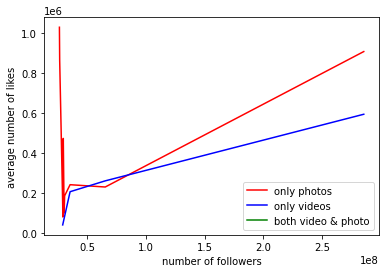

In [78]:
plt.plot(result1.followers, result1.numbr_likes, 'r')
plt.plot(result2.followers, result2.numbr_likes, 'b')
plt.plot(result3.followers, result3.numbr_likes, 'g')
plt.xlabel('number of followers')
plt.ylabel('average number of likes')
plt.legend(['only photos', 'only videos', 'both video & photo'])
plt.show()

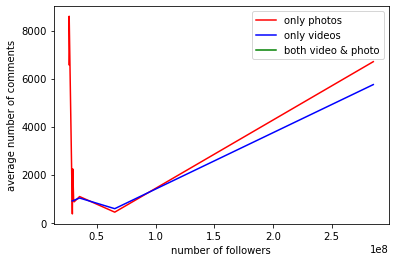

In [79]:
plt.plot(result1.followers, result1.number_comments, 'r')
plt.plot(result2.followers, result2.number_comments, 'b')
plt.plot(result3.followers, result3.number_comments, 'g')
plt.xlabel('number of followers')
plt.ylabel('average number of comments')
plt.legend(['only photos', 'only videos', 'both video & photo'])
plt.show()

We observe a increasing monotonous relationship (starting from a certain number of followers) between the popularity of a profile and the average number of likes and posts recieved. We know that profiles with a larger 'audience' get, on average, more feedback from their comminity.

# [RQ 6] It's time to get information from the user posting effectiveness.

**[RQ6] It's time to get information from the user posting effectiveness.**

**Importing Libraries**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter

**Read Dataset**

In [14]:
posts = pd.read_csv('~/instagram_posts.zip', delimiter='\t',usecols = ['sid_profile','cts'])
posts.head()

,sid_profile,cts
0,3496776,2017-08-06 20:06:57.000
1,-1,2017-06-19 09:31:16.000
2,-1,2017-03-11 20:05:03.000
3,-1,2016-09-13 16:27:16.000
4,-1,2015-10-18 10:19:27.000


**Extracting only important columns**

In [15]:
posts = posts.sort_values(by = ['sid_profile', 'cts'])
posts.head()

,sid_profile,cts
35149671,-1,2010-07-19 01:12:23.000
4225968,-1,2010-08-21 06:40:27.000
1939650,-1,2010-09-05 21:48:24.000
39517938,-1,2010-09-06 18:36:05.000
35207772,-1,2010-10-15 00:48:15.000


1. What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.


In [16]:
def timeAvg(df):
    
    #sorting the dataset with respect to sid_profile and cts
    df.sort_values(by = ['sid_profile', 'cts'], inplace=True) 

    #initializing dictionaries
    records = dict()
    prev_date = dict()
    profile_avg_posting = dict()

    #calculating time between posts
    for idx, row in df.iterrows():
        if row['sid_profile'] not in records:
            records[row['sid_profile']] = []
            prev_date[row['sid_profile']] = datetime.strptime(row['cts'][:-4], "%Y-%m-%d %H:%M:%S").timestamp()

        elif row['sid_profile'] in records:
            records[row['sid_profile']].append(datetime.strptime(row['cts'][:-4], "%Y-%m-%d %H:%M:%S").timestamp() - prev_date[row['sid_profile']])
            prev_date[row['sid_profile']] = datetime.strptime(row['cts'][:-4], "%Y-%m-%d %H:%M:%S").timestamp()            

    for k, v in records.items():
        try:
            #calculating average time between posts
            profile_avg_posting[k] = int(round(sum(v)/len(v)))
            #calculating total average time between posts
            average = sum((profile_avg_posting.values()))//len((profile_avg_posting.values()))
        except ZeroDivisionError:
            pass

        #Top 3 profiles that publish posts more frequently
        top_3 = Counter(profile_avg_posting)
        high = top_3.most_common(3)

        keys = [top[0] for top in high]
        values = [top[1] for top in high]
        
    #Plotting profile ID with average time 
    plt.bar(range(len(keys)), values, tick_label=keys)
    plt.title("[RQ6.1]")
    plt.xlabel("Profile ID")
    plt.ylabel("Average Time")
    plt.show()
    
    #converting time into days and minutes 
    days = 0
    mins = 0
    time = average
    days = time // (24 * 3600)
 
    time %= 3600
    mins = time // 60
    
    return days, mins

In [ ]:
days, mins = timeAvg(posts)

print("The average time (days and minutes) a user lets pass before publishing another post is",
          str(days) + " day(s), "+ str(mins) +  " mins. ")

The above graph depicts that these three profiles on x-axis posts very frequently and have the least average time between theirs posts.

2. Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

In [ ]:
def reactionAvg(df):
    
    #sorting the dataset with respect to cts
    df.sort_values(by = ['cts'], inplace=True)
    
    #formating given time
    df['time'] =  pd.to_datetime(df['cts'], format="%Y-%m-%d %H:%M:%S")

    #extracting hours
    df['Hours'] = df['time'].dt.hour
    
    #grouping by hours and calculating mean of other values (number of likes)
    df = df.groupby(['Hours']).mean()
    
    #plotting
    plt.figure(1, figsize=(16,6))
    plt.subplot(1,2,1) 
    plt.bar(df.reset_index()['Hours'], df.reset_index()['numbr_likes'])
    plt.title("[RQ6.2]")
    plt.xlabel("Time Intervals")
    plt.ylabel("Maximum Average Likes")
    plt.subplot(1,2,2) 
    plt.bar(df.reset_index()['Hours'], df.reset_index()['number_comments'])
    plt.title("[RQ6.2]")
    plt.xlabel("Time Intervals (hours")
    plt.ylabel("Maximum Average Comments")
    
    
    plt.show()


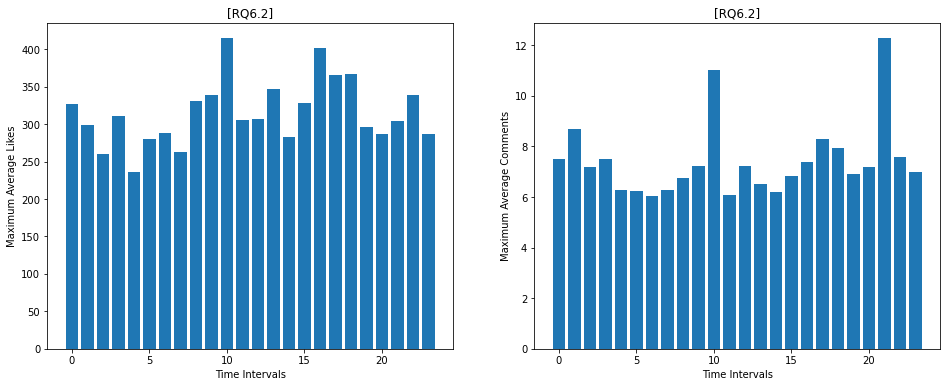

In [ ]:
reactionAvg(posts)

# [RQ 7.1] What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

In [5]:
data_sidlikes = pd.read_csv('~/instagram_posts.zip', delimiter='\t',usecols = ['profile_id','numbr_likes'])

In [10]:
profiles.dropna(subset=['profile_id'],inplace=True)

In [12]:
data_sidlikes.dropna(subset=['profile_id'],inplace=True)

In [6]:
data_sidfollowers = profiles[['profile_id','followers']]

After taking only the columns of posts that we needed, we drop rows with values of profile_id equals to null. Now we can do a merge of these two dataset

In [13]:
likesfollowers = pd.merge(data_sidlikes, data_sidfollowers, how='inner', on = 'profile_id')
likesfollowers.head()

,profile_id,numbr_likes,followers
0,2.237948e+09,80.0,1204.0
1,2.237948e+09,86.0,1204.0
2,2.237948e+09,168.0,1204.0
3,2.237948e+09,102.0,1204.0
4,2.237948e+09,145.0,1204.0


In [14]:
likesfollowers['sopra20'] = likesfollowers['numbr_likes']/likesfollowers['followers'] >= 0.2

This is a new variable that has true when the number of likes is bigger than 20% of followers for each profile, and false otherwise.

In [15]:
relative_counts=likesfollowers["sopra20"].value_counts(normalize=True)
print(relative_counts)

False    0.844075
True     0.155925
Name: sopra20, dtype: float64


Doing a relative count we have the percentage of true that is equal to the probability that a post receives more than 20% "likes" of the number of followers a user has

# [RQ 7.2] Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not

In [25]:
posts = pd.read_csv('~/instagram_posts.zip', delimiter='\t',usecols = ['profile_id','location_id','cts'])

In [27]:
posts.cts = pd.to_datetime(posts['cts'])
posts.cts = posts['cts'].dt.date

In [30]:
posts.cts.head()

0    2017-08-06
1    2017-06-19
2    2017-03-11
3    2016-09-13
4    2015-10-18
Name: cts, dtype: object

This code transforms cts in only year-month-day without hours minutes and seconds, so we can compare posts of different days

In [31]:
posts = posts.drop_duplicates(keep='first')

Now we drop duplicates to eliminate profiles that had posted twice in same location but also on the same day

In [53]:
visits_count = posts.groupby(['profile_id','location_id']).count().reset_index()
display(visits_count)

,profile_id,location_id,cts
0,3.000000e+00,1.000000e+01,1
1,3.000000e+00,5.400000e+01,1
2,3.000000e+00,8.030000e+02,1
3,3.000000e+00,1.526200e+04,1
4,3.000000e+00,2.705200e+04,1
...,...,...,...
21096130,9.001013e+13,6.631216e+14,1
21096131,9.001013e+13,2.075964e+14,1
21096132,9.001013e+13,1.855425e+14,1
21096133,9.001013e+13,2.418404e+08,1


Grouping with groupby we collect on the cts column the times that a profile_id went to a location.

In [60]:
visits_count2 = visits_count[visits_count['cts']>1]
visits_count2 = visits_count2.drop_duplicates(subset=['profile_id'],keep='first')

So counting rows with cts>1 we have the number of people that went to a location more than once in different days

In [62]:
print('The probability that a user returns to a site after having posted it in the past is:',visits_count2.shape[0]/len(profiles))

The probability that a user returns to a site after having posted it in the past is: 0.3915397757362458


The probability is 39%. This probability is not so significant because we assume that people publish a post with a location tag only when they are in that place; instead we know for our experience that people usually publish posts also after visiting a location, and can be more than one post for each trip.

# [RQ 8.1] Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

In [2]:
import pandas as pd
posts = pd.read_csv('~/instagram_posts.zip', delimiter='\t',usecols = ['numbr_likes','number_comments','cts'])

<AxesSubplot:xlabel='numbr_likes', ylabel='number_comments'>

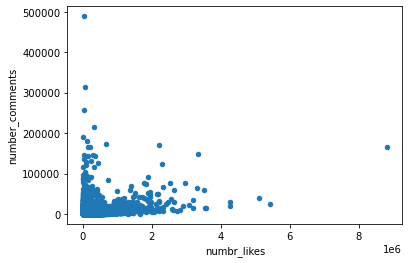

In [70]:
data_likescomments.plot(x='numbr_likes',y='number_comments',kind='scatter')

This is a scatter plot that show the relationship between number of likes and number of posts

# [RQ 8.2] Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

For this task we could use an anova test that is a statistical formula used to compare the variances between the means of different groups.

In [4]:
posts = pd.read_csv('~/instagram_posts.zip', delimiter='\t',usecols = ['number_comments','numbr_likes','cts'])

In [6]:
# converting the cts attribute in date time
posts.cts = pd.to_datetime(posts['cts'])
posts.dropna(subset=['cts'],inplace=True)

In [7]:
!pip3 install scipy

In [8]:
from scipy.stats import f_oneway

Using the anova test we can compare the variance between the mean of time intervals and the mean of likes and comments

# [RQ 8.3] What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

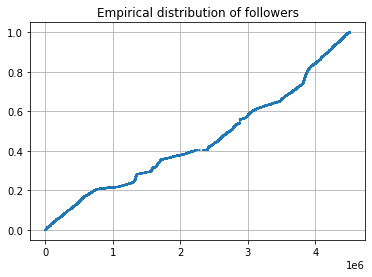

In [15]:
import numpy as np
def ecdf(x):
  x = x / np.sum(x)
  return np.cumsum(x)

ef=ecdf(profiles['followers'])
ef.plot(title = 'Empirical distribution of followers')
plt.grid()

In [38]:
data_profiles['followers'].describe()

count    3.452771e+06
mean     4.739899e+03
std      1.939087e+05
min      0.000000e+00
25%      1.590000e+02
50%      4.060000e+02
75%      9.740000e+02
max      2.854576e+08
Name: followers, dtype: float64

In [39]:
data_profiles['followers'].mode()

0    0.0
Name: followers, dtype: float64

The mean is bigger than the median because the second one is a stronger index that is less affected by outliers. This result shows that the followers distribution has a positive asymmetry. Also quartiles cover a quite small range that goes from 1.590000e+02 to 9.740000e+02 showing that half of the ditribution is inside this small range

# [RQ 8.4] What are histograms, bar plots, scatterplots and pie charts used for?

Histograms show the distribution of the data divided in bins. It is used for continuous variables and from that we can broadly understand the trend of a variable of a dataset. The number of bins determines how specific the representation is of data. We will have a more specific representation for a higher number of bins and a more generic one for a smaller number of bins.
Bar plots represents with bars the frequency of a categorial variable. It can be used with a relative frequency or an absolute frequency.
The scatterplot is used to evaluate the relationship between two quantitative variables. In this type of graph, the two variables are shown as points on a Cartesian space, the values of one variable are indicated on the horizontal axis (x), while the values of the other variable are represented on the vertical axis (y).
Pie charts are used to show the relationship between categorical or nominal data. So we can have a representation of dimensions of each part on the total, usually with the use of percentages.

# [RQ 8.5] What insights can you extract from a Box Plot?

From a boxplot we can first of all see the general distribution. It shows the range of the distribution (so minimum and maximum values) and also any outliers in the dataset. Then we can also extract the quartiles and the median (that is equal to the second quartile)

# [AQ 1]

In want to understand the output of the given algorithm and how it works. 

We study the internal mechanism of our algorithm and try to guess its all possible outcomes.
How we proceed :
>- first we do a brief analysis of the algorithm with a qualitative description of what happens at each step;
>- we report a complete analysis of the algorithm and analytically measure its efficiency ;
>- then we proceed with the implementation of it so as to reinforce our assumptions about its nature with practical examples:
>- finally we discuss about the optimality of this algorithm and try to find a better solution.

### How does it work?

We know that we have two functions:
>- f2: is the main *RECURSIVE* function;
>- f1: the ausiliar function that simply takes as input a sequence of characters and an 'end' integer and prints alll the characters in the sequence till the end-th element.

INPUT : Basically f2 takes as input a 'sequence' of characters (an 'alphabet' population) and an integer 'N' that defines the cardinality of the sample space. 

OUTPUT : The function prints out all possible permutations of a set of cardinality 'N'.

ANALYSIS:
>- We identify f2 as the main function in that it simply exploits f1 as the *base case* of recursion (a 'bottom out' on *inputs of some constant size*);

>- on the first call of f2 the algorithm iterates N times so as to assign one of the N elements to the first place of the single permutation;

>- then passing to the recursive call of f2 which (the second call of the function itself) useful for assigning one of the N-1 remaining elements to the second place of the single permutation --> now we have 2 fixed elements and we have to fill the rest of free positions;

>- so on until all the places of the single permutation are filled and pursue the printing of all the elements of the single permutation;

>- clearly we call f1 N! times every time the algorithm completes a single permutation: the f1 function takes n steps to print each element of the permutation.

The algorithm reported actually uses a divide-and-conquer type technique in which we reduce the original problem to a less complex problem with fewer iterations.
Specifically in this case it is a decrease and conquer algorithm in that with each recursion we derive a single subproblem of smaller size.

We can graphically describe the algorithm by a tree structure in which each level of the tree indicates an iteration of the second for loop in f2 (n levels in total). At each i-th level we will have fixed the first i positions of a permutation with values taken from the sequence. The children of the generic node at level i will present one more position with value fixed. We finally arrive at a leaf node from which we proceed with the print of the elements of the leaf itself and return back to the tree to continue with our visit in depth.

Note that at each level the number of branches per single node decreases as the positions left empty in the single permutation also decrease (the problem becomes simpler and simpler).

At each iteration we have a pointer to the first element of the permutation that is not arleady fixed and we iteratevly switch its value with the value of one of the remaining elemnts in the sequence (not arleady assigned). So each branch in this tree represents this switching value operation

![tree](\Users\stefa\ADMP10.png)



We know that at each recurrence the steps of the for loop decrease of a factor 1 till the last recurrence, where we have an input of size 1 and the algorithm runs the loop of the f1 function with a fixed number of steps equals to N.

$$
\begin{aligned}
&T(N)=N T(N-1)+c\\
&=N[(N-1) T(N-2)+c]+c\\
&=N(N-1) T(N-2)+N c+c\\
&=N(N-1)[(N-2) T(N-3)+c]+N c+c\\
&=N(N-1)(N-2) T(N-3)+N(N-1) c+N c+c\\
&=N(N-1)(N-2) T(N-3)+c(1+N+N(N-1))\\
&=N \cdot N !+c(1+N+N(N-1)+\cdots+N(N-1)(N-2)\cdot \cdots(N-(N-2))\cdot N)\\
&T(N)=N \cdot N !+\left(\sum_{k=0}^{N-2} \frac{N \cdot N !}{(N-k) !}\right) c + c=N \cdot N !+\left(\sum_{k=0}^{N-2} \frac{1}{(N-k) !}\right) N \cdot N!\cdot c + c\\
\end{aligned}
$$

We can easly verify that the sum $\sum_{k=0}^{N-2} \frac{1}{(N-k) !}$ converges and for N that grows to inf can be seen as constant

$$
\begin{aligned}
&N \cdot N !+\left(\sum_{k=0}^{N-2} \frac{1}{(N-k) !}\right) N \cdot N!\cdot c + c =O(N \cdot N !)\\
\end{aligned}
$$

### Implementing the algorithm in python 

In [80]:
def f1(sequence,end):
    for i in range(end):
        print(sequence[i])
    print('\n')

def f2(sequence,start,end):
    if( start==end):
        f1(sequence,end)
    else:
        for i in range(start,end):
            temp =  sequence[start]
            sequence[start] = sequence[i]
            sequence[i]  = temp
            f2(sequence,start+1,end)
            temp =  sequence[start]
            sequence[start] = sequence[i]
            sequence[i]  = temp

In [81]:
# as trivial example we use the algorithm for a sequence of 3 characters

List = ['x','y','z']
N = 3
f2(List, 0, N)

x
y
z


x
z
y


y
x
z


y
z
x


z
y
x


z
x
y




### Finding better a solution (?)

This algorithm is the most efficient one because (qualitatively speaking) we necessarly need at least N! steps to build all over the N! possible permutations and we also need N steps in order to print every single permutation (we must iterate over N elements of each simple permutation). This algorithm is based on a decrease-and-conquer technique with a simple recursion and it exploits the switch operation on the pointer to the first element among those not yet fixed. This structure of the algorithm allows the machine to avoid some redundant allocation of space: we don't use ausiliar heaps, lists to build the permutations.

# [AQ 2]

### Introduction to the algorithm with a simple recursion

In some way as in the proposed algorithm for the the permutations of a sequence (in the previuos points), we can reduce the problem to a subproblem, recursively iterating over a smaller size array but in this case we use a dynamic programming technique.

In dynamic programming one implicitly explores the space of all the possible solutions by decomposing things in sub-problems and then building-up correct solutions to larger and larger subproblems (operating very close to the edge of brute-force search).

We have two types of approaches to dynamic programming:
1. iteratively building-up subproblems;
2. formulating the algo. as a memorized recursion (e.g. our algorithm below).

As we show in the scheme below we don't really need to iterate over any possible combination of pieces but we recursively find an optimum for a subproblem

![tree](\Users\stefa\ADMP13.png)

### Let's first have a look to the *rec_cut_multiplication* function

This is an ausiliar function that is recursively called

INPUT:

an integer that indicates the legth of the ribbon


PROCESS:

>- find almost all the possible combinations of pieces of the ribbon with different length. We avoid to find a large quantity of combinations thanks to the fact that we only need the products of this length. Indeed we are not really interested in finding all the possible combinations of pieces, but we want to find all the possible products of these lengths --> production of the various pieces remains the same when I have all pieces of the same length but distributed with a different order (just referring to the commutative property of multiplication)

>- we evaluate the maximum product for each subproblem (we memorize these length within a record) until we only need the maximum product of the larger sub-problem with all the possible lengths of the rest of the ribbon


OUTPUT: 

an array of optimal solutions of the largest subproblems

In [17]:
import math

def rec_cut_multiplication(N):
    
    # base case of the recursion
    if N == 1:
        return [1]
    
    # building a ribbon of size N
    arr = np.zeros(N)
    # recording every production of the lengths of the partitions
    products = []   
    
    n = ceil(N/2) # we can jump some iteration thanks to the symmetry of the outputs
    for i in range(1, n+1):  # note that we start from i=1 since we want at least two partitions of the ribbon
        
        left_part, right_part = len(arr[:i]), len(arr[i:]) # building the 2 partitions 
        
        products.append(left_part * right_part)
        products.append(left_part * max(rec_cut_multiplication(right_part)))
        
    return products

In [20]:
# example of output of the function... you can compare it with the scheme above
opt = rec_cut_multiplication(5)
print(opt)

[4, 4, 6, 4, 6, 3]


### Then the second part of the algorithm with the *ribbon_cuts* function

We arleady explained the core of the algorithm, now we have to reconstruct the lengths of the partitions of the ribbon. We can have a large quantity of solutions for these part of the algorith (due to distributive, associative and deassociative properties of the multiplication).
So we simply report the decomposition into prime factors of the maximum of the output from the ausiliar function.

In [24]:
def primeFactors(n):

    # first control on the prime number two 
    while n % 2 == 0:
        print(2)
        n = n / 2
         
    # n is odd so we find another prime number
    for i in range(3,int(math.sqrt(n))+1,2):
         
        # while i divides n , print i and divide n
        while n % i== 0:
            print(int(i)),
            n = n / i
             
    # is prime and grater than 2 at this point
    if n > 2:
        print(int(n))

def ribbon_cuts(opt):
    return primeFactors(max(opt))

In [26]:
# continuing the exaple witha ribbon of length 5
ribbon_cuts(opt)

2
3


Although we wanted to try a solution via stored recursion in dynamic programming, we can easily see that our algorithm is exponential. We can evaluate the number of steps for the *rec_cut_multiplication* function:

$$
\begin{aligned}
&T(N)= \frac N2 T(N-1)+c\\
&=\frac N2 \left(\frac{(N-1)}2 T(N-2)+c\right)+c\\
&=\frac N2 \cdot \frac{(N-1)}2 \left(\frac{(N-2)}2 T(N-3)+c\right)+2c\\
&=\frac N2 \cdot \frac{(N-1)}2 \cdot \frac{(N-2)}2 \cdots \cdot \frac{(N-N/2)}2\\
&=\frac {N!}{2^{N/2} \cdot \left( \frac N2 \right)!}\\
\end{aligned}
$$

Then we can easly see that the *primeFactors+ function runs in $O(sqrt(N))$ so the total running time is exponential